# About dataset

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3390 records and 15 attributes.¶
## Variables
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.

## **Data Description**
## **Demographic:**

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [ ]:
import datetime
print(f"This notebook was last run on: {datetime.datetime.now()}")

This notebook was last run on: 2024-08-04 14:00:58.522012


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer, SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# EDA

In [ ]:
train_df.head(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
train_df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
train_df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

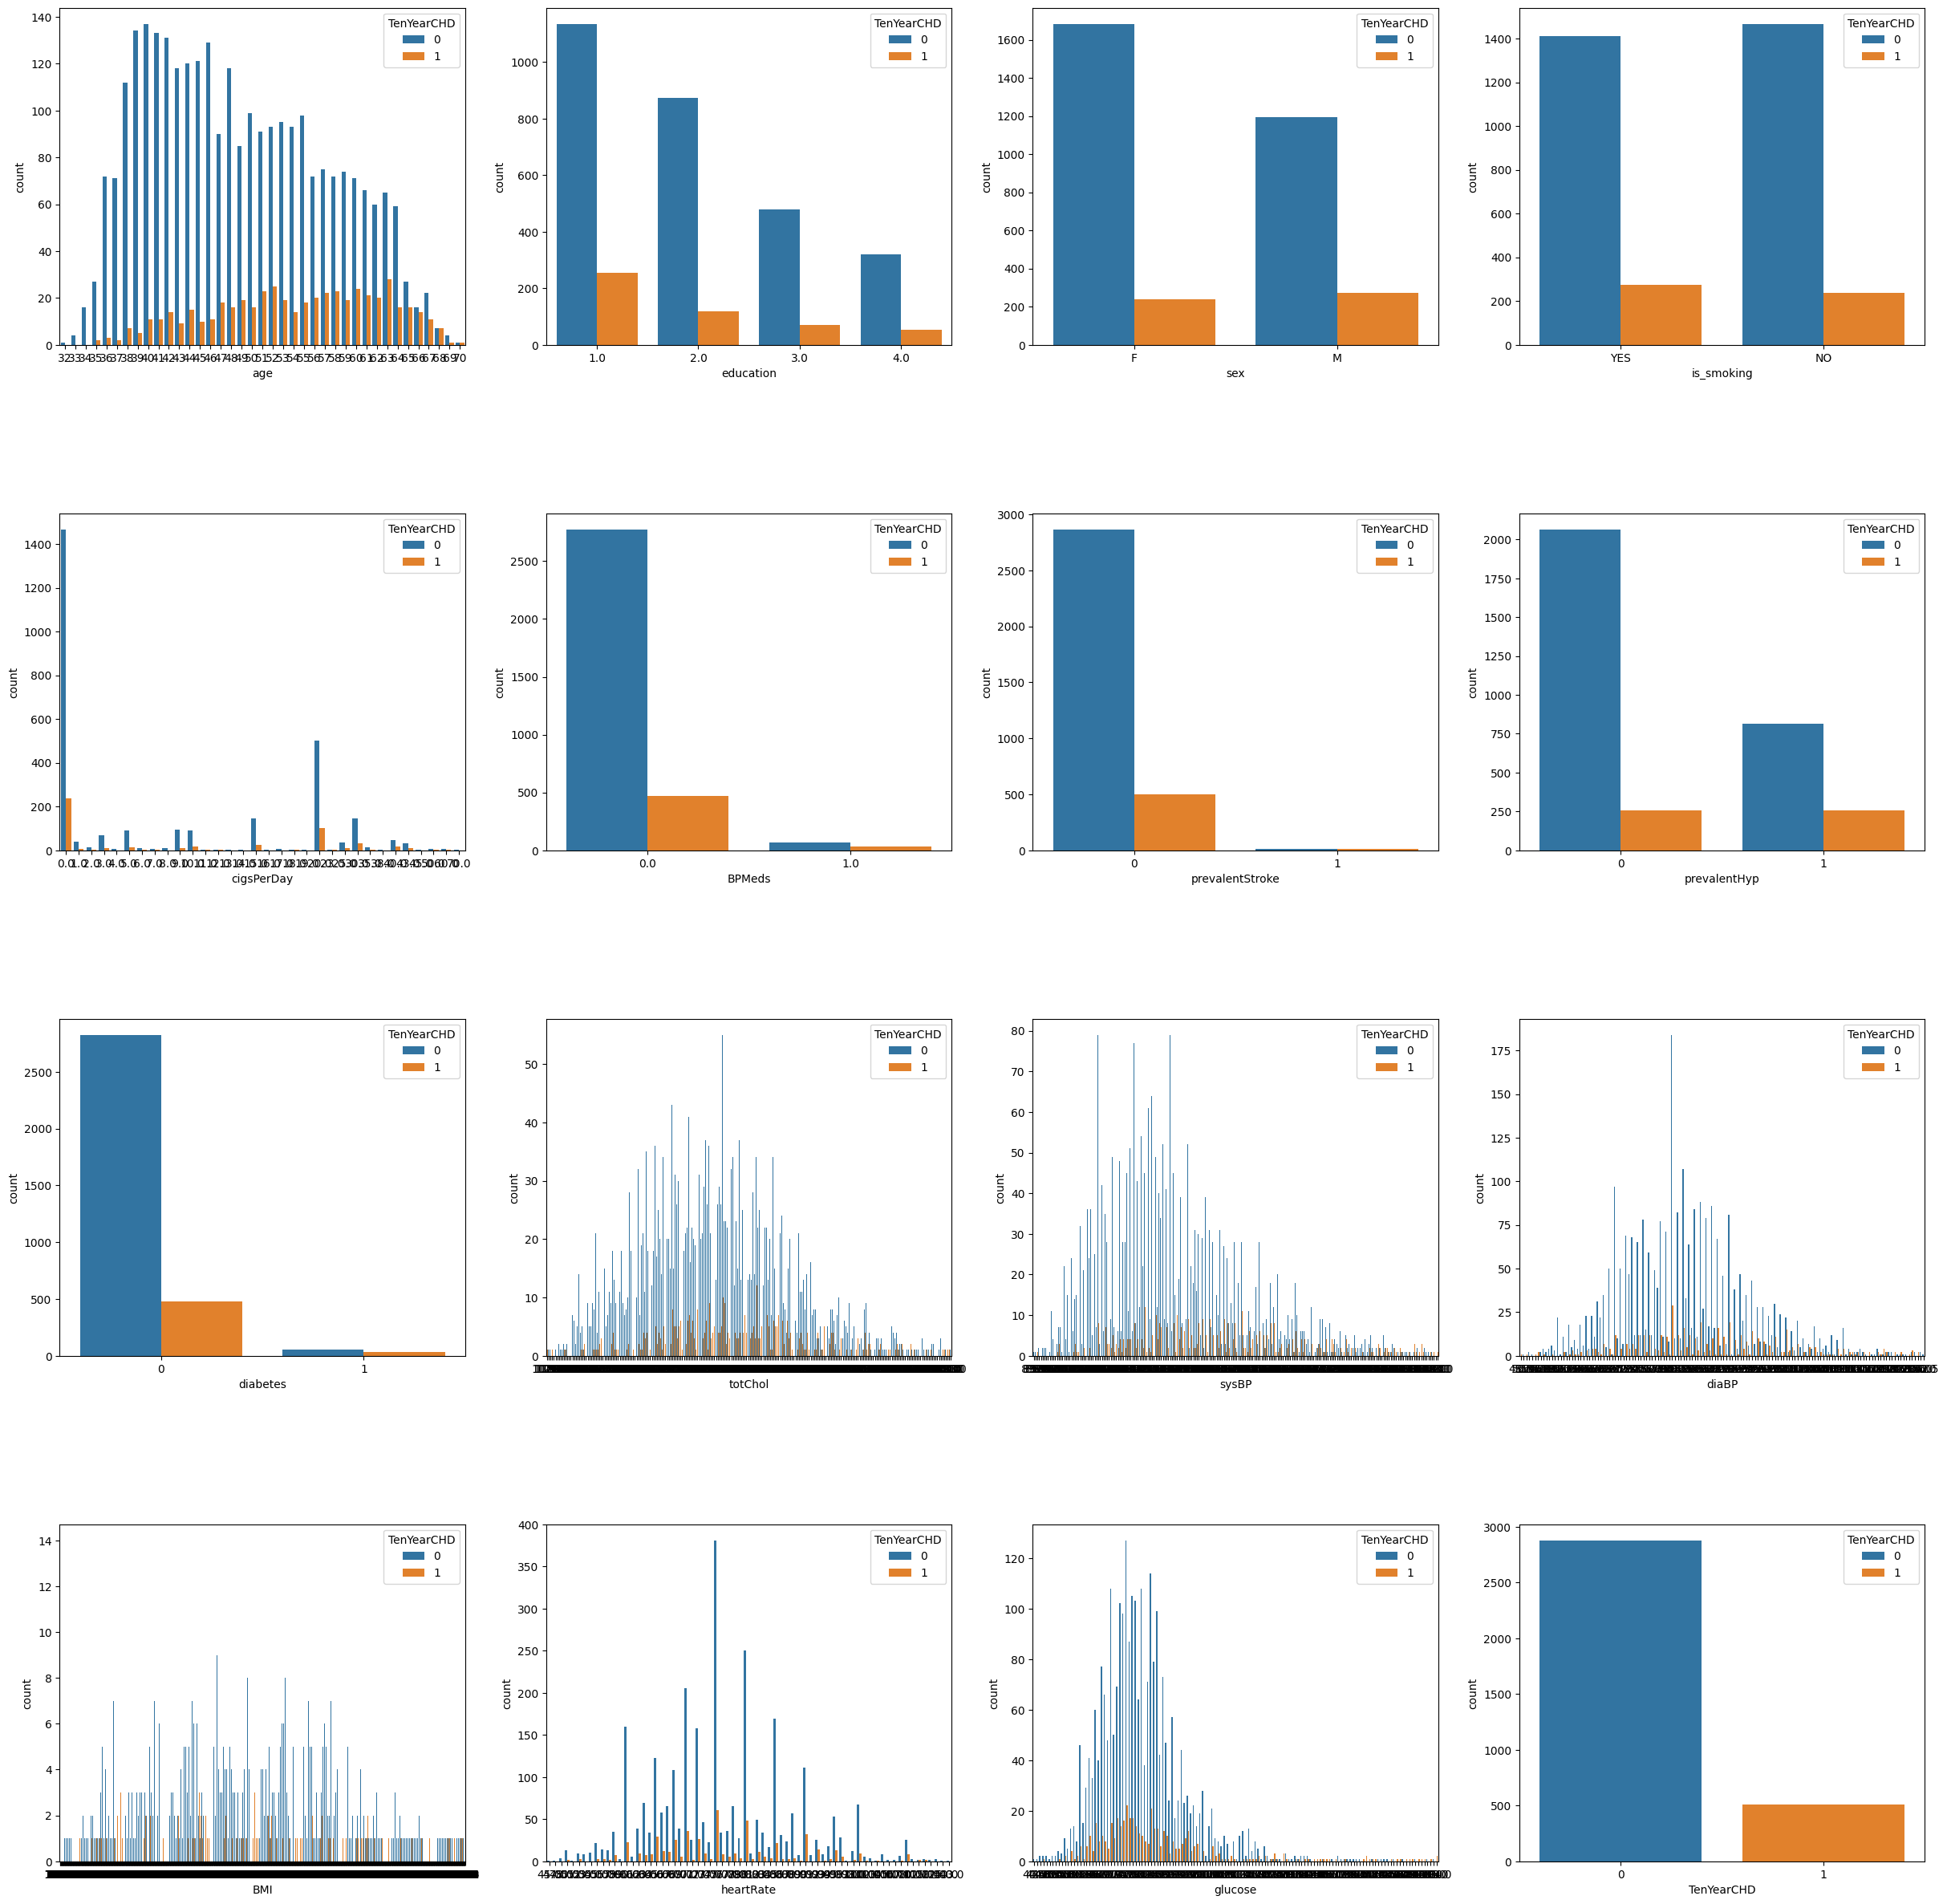

In [ ]:
# plt.subplots(4, 4)
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i in range(1, len(train_df.columns)):
  plt.subplot(4, 4, i)
  sns.countplot(x = train_df.columns[i], data = train_df, hue = "TenYearCHD")

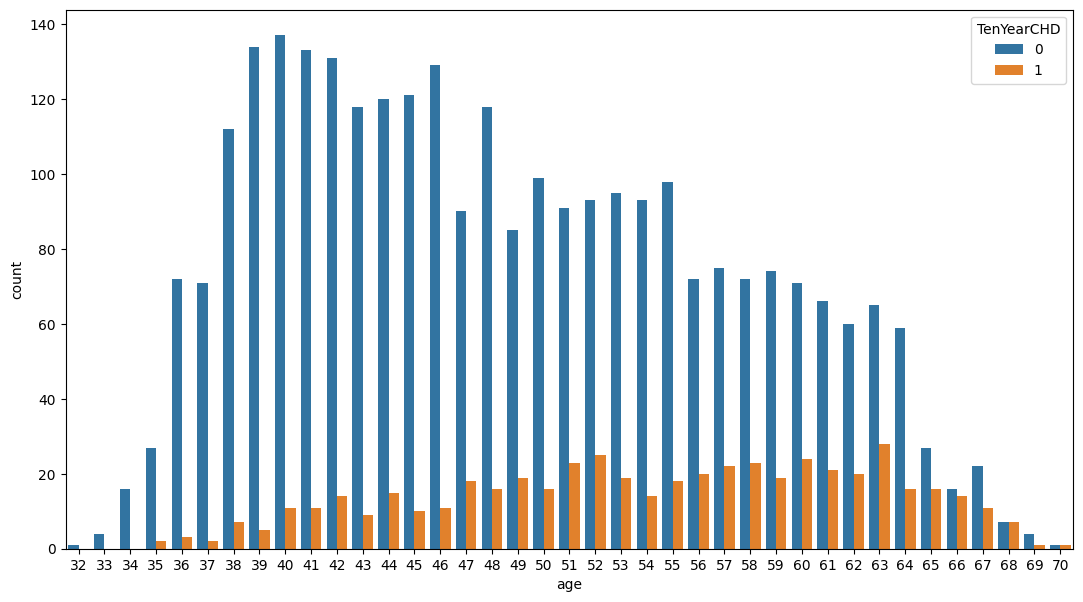

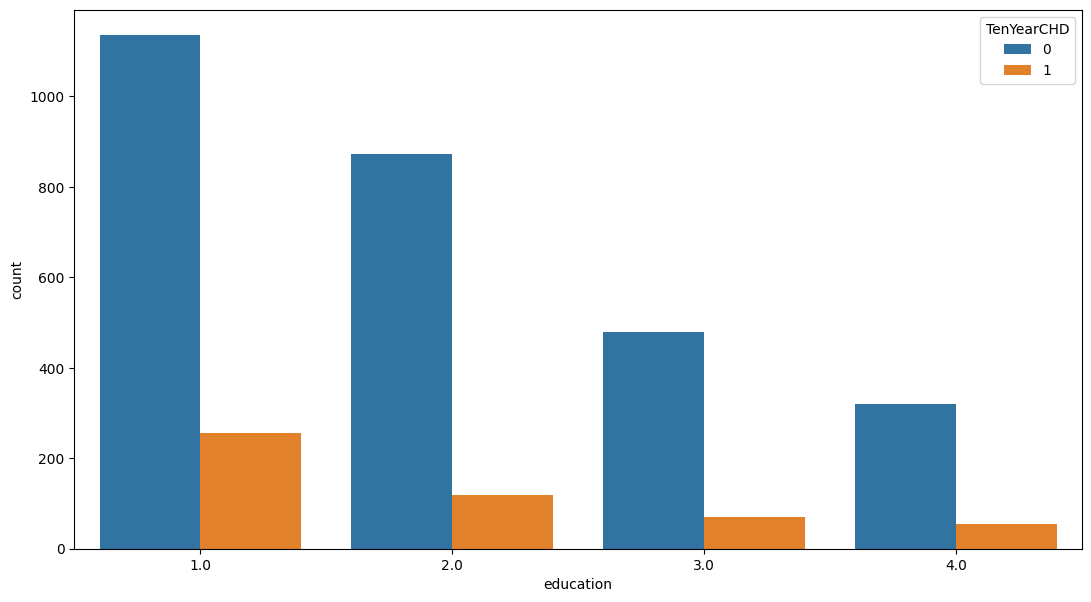

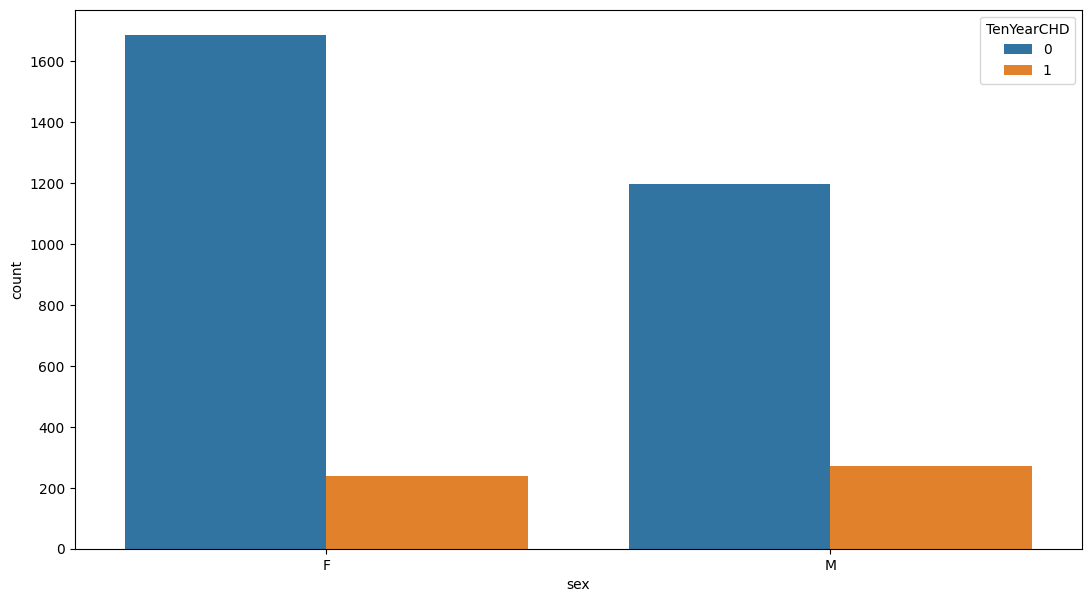

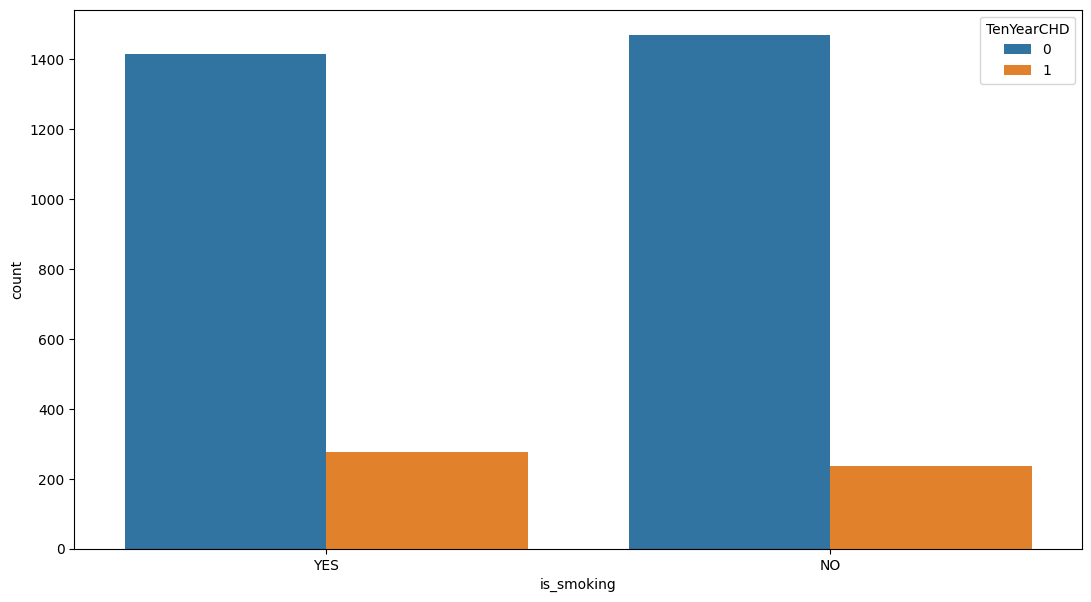

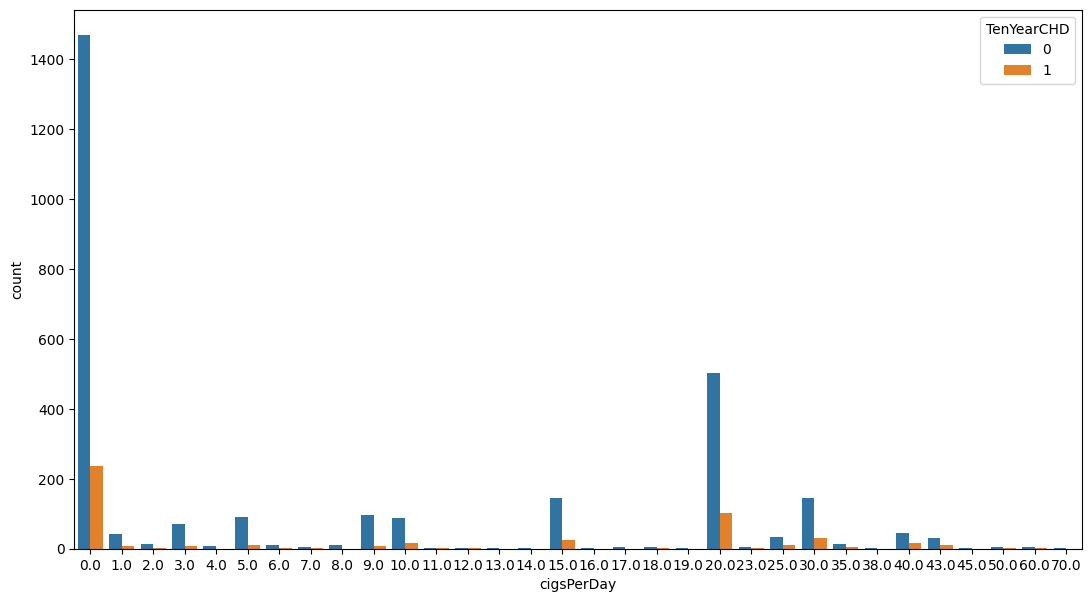

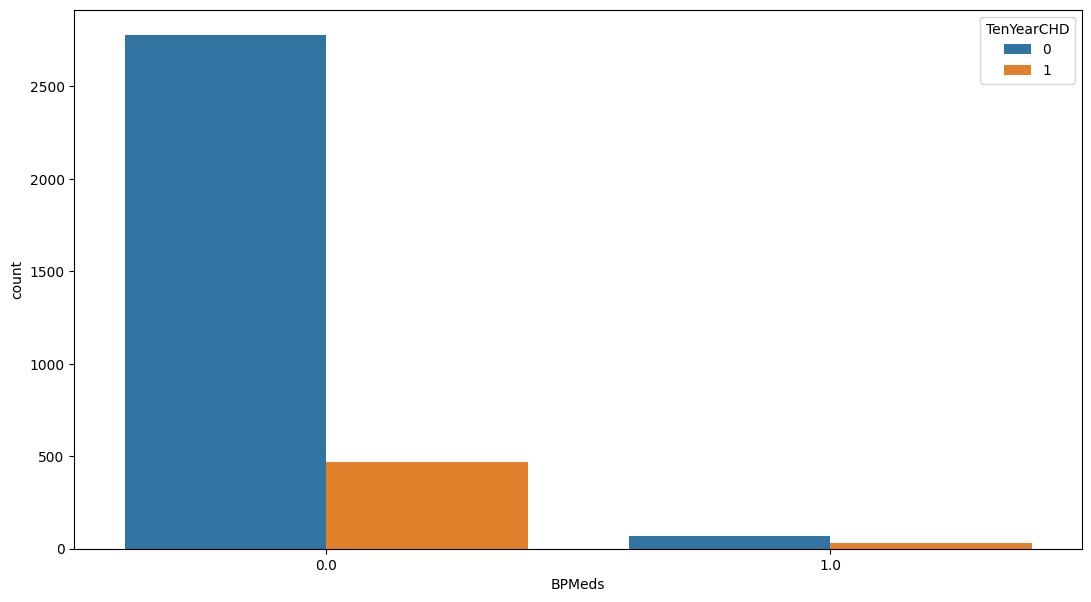

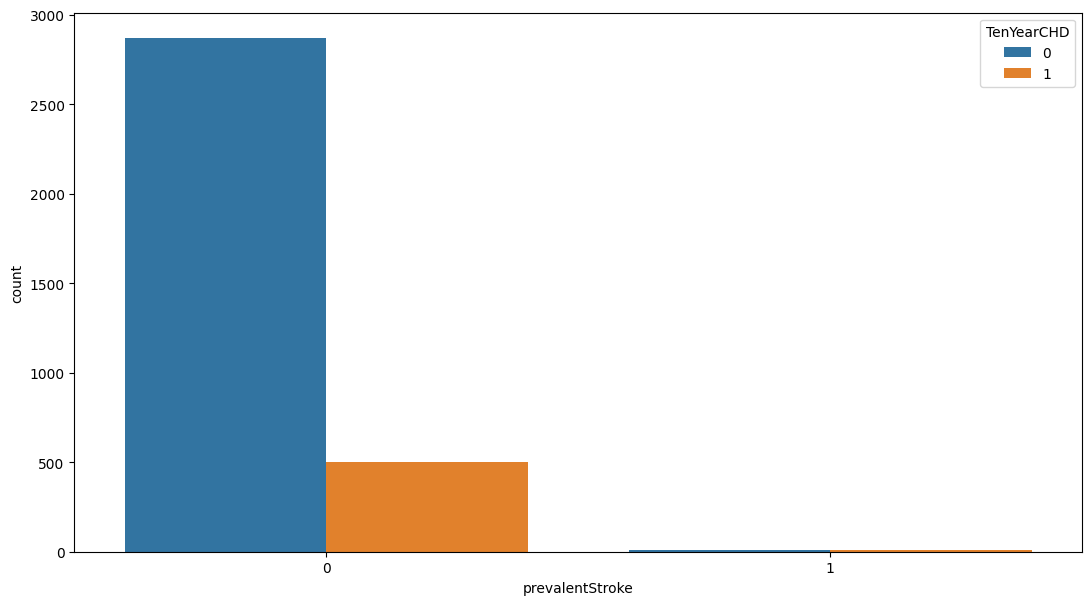

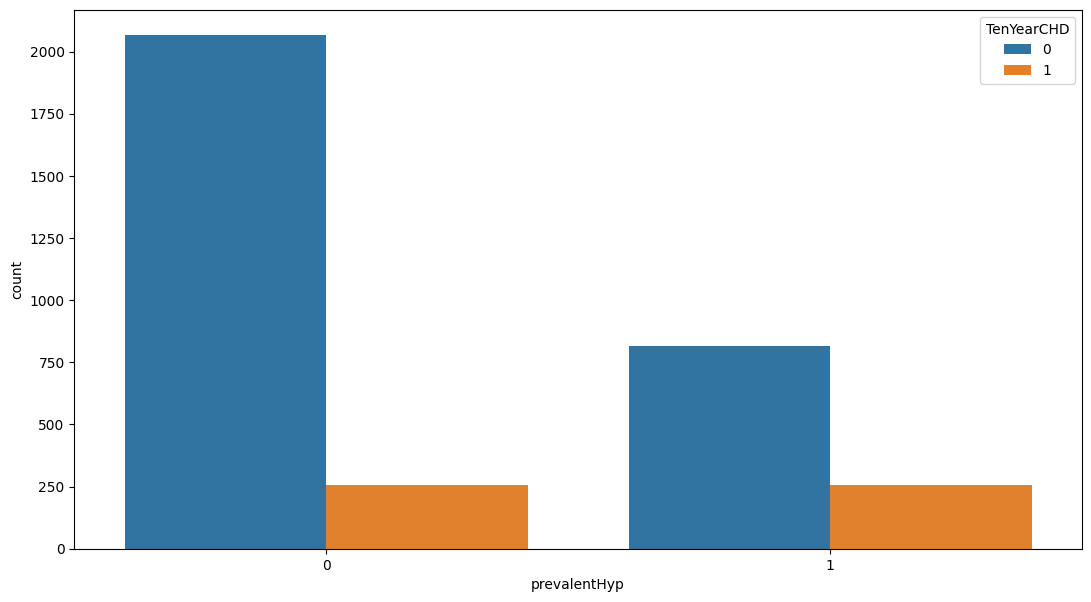

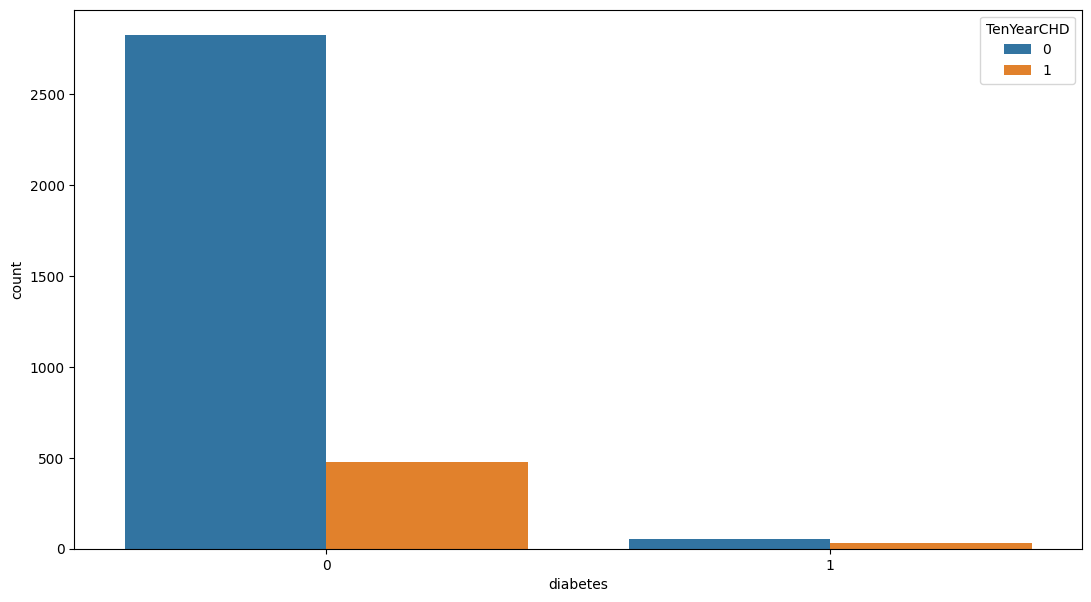

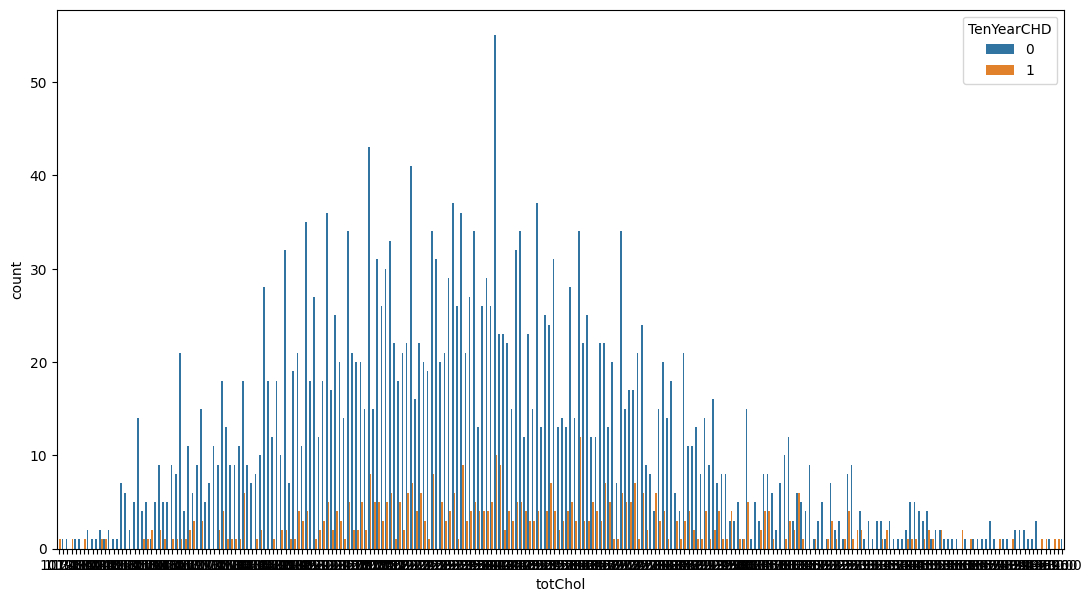

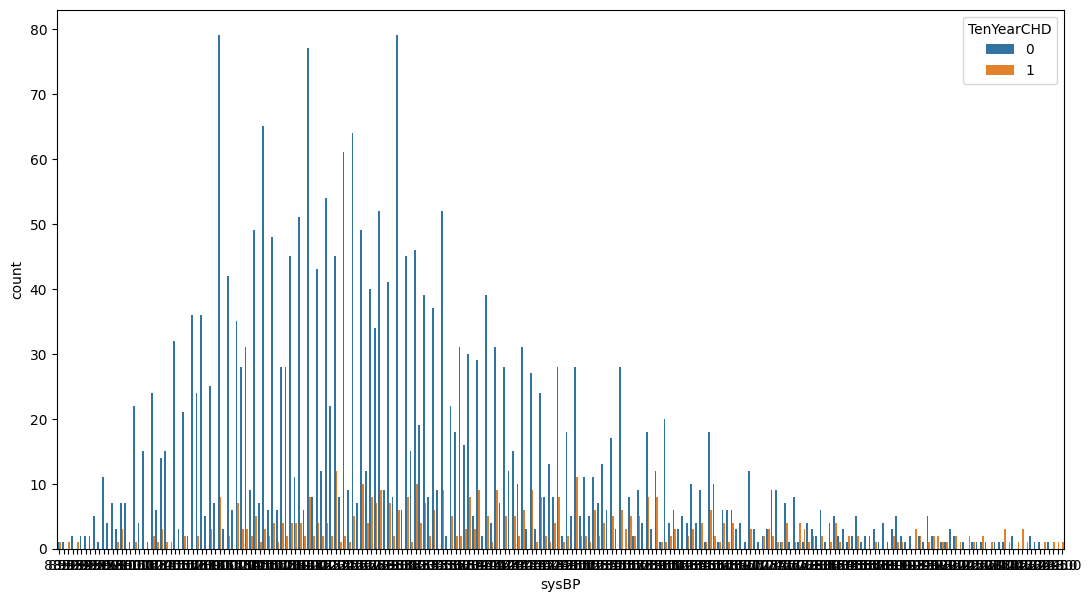

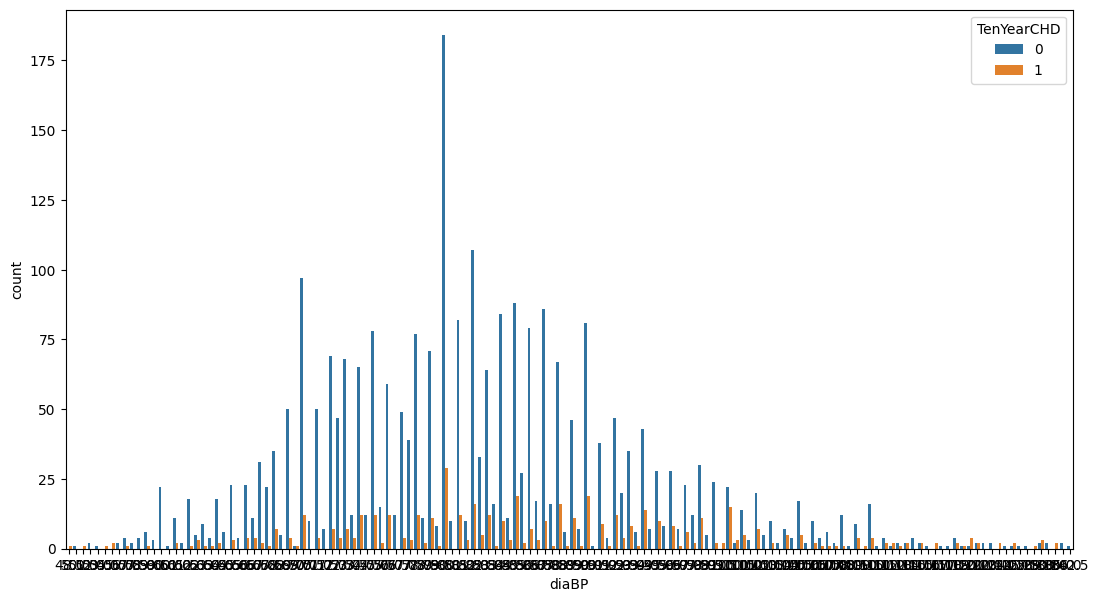

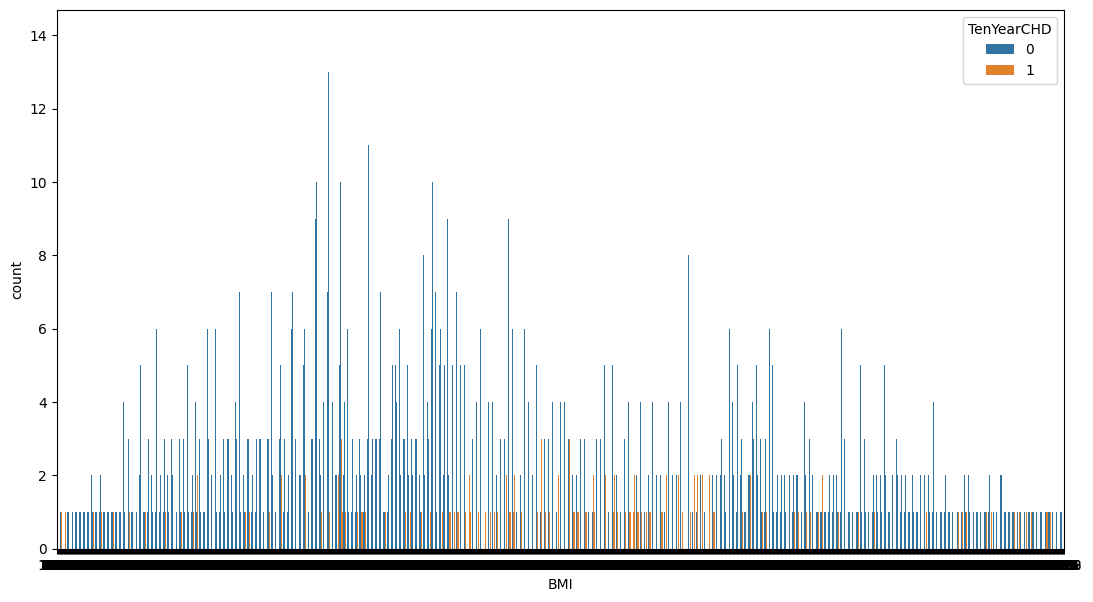

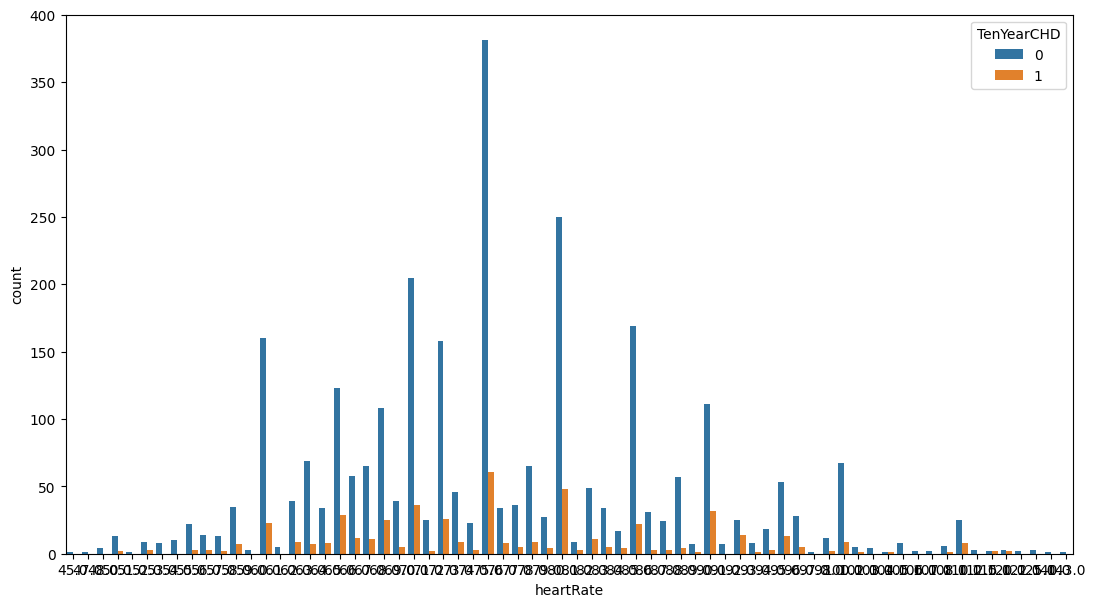

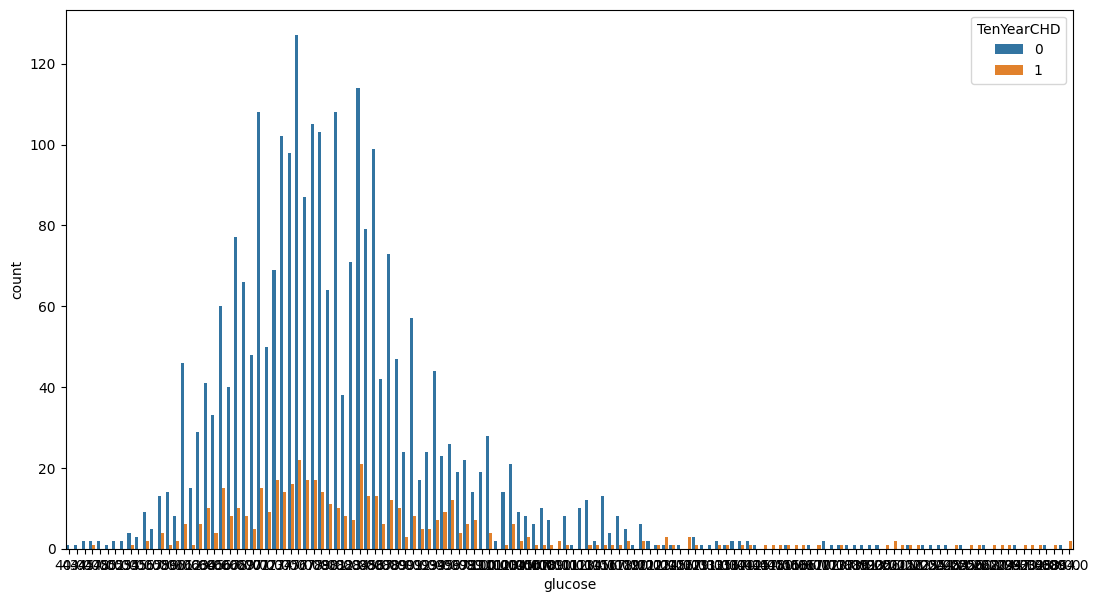

In [ ]:
for i in range(1, len(train_df.columns)-1):
  plt.figure(figsize = (13, 7))
  sns.countplot(x = train_df.columns[i], hue = "TenYearCHD", data = train_df)

<Axes: xlabel='heartRate', ylabel='count'>

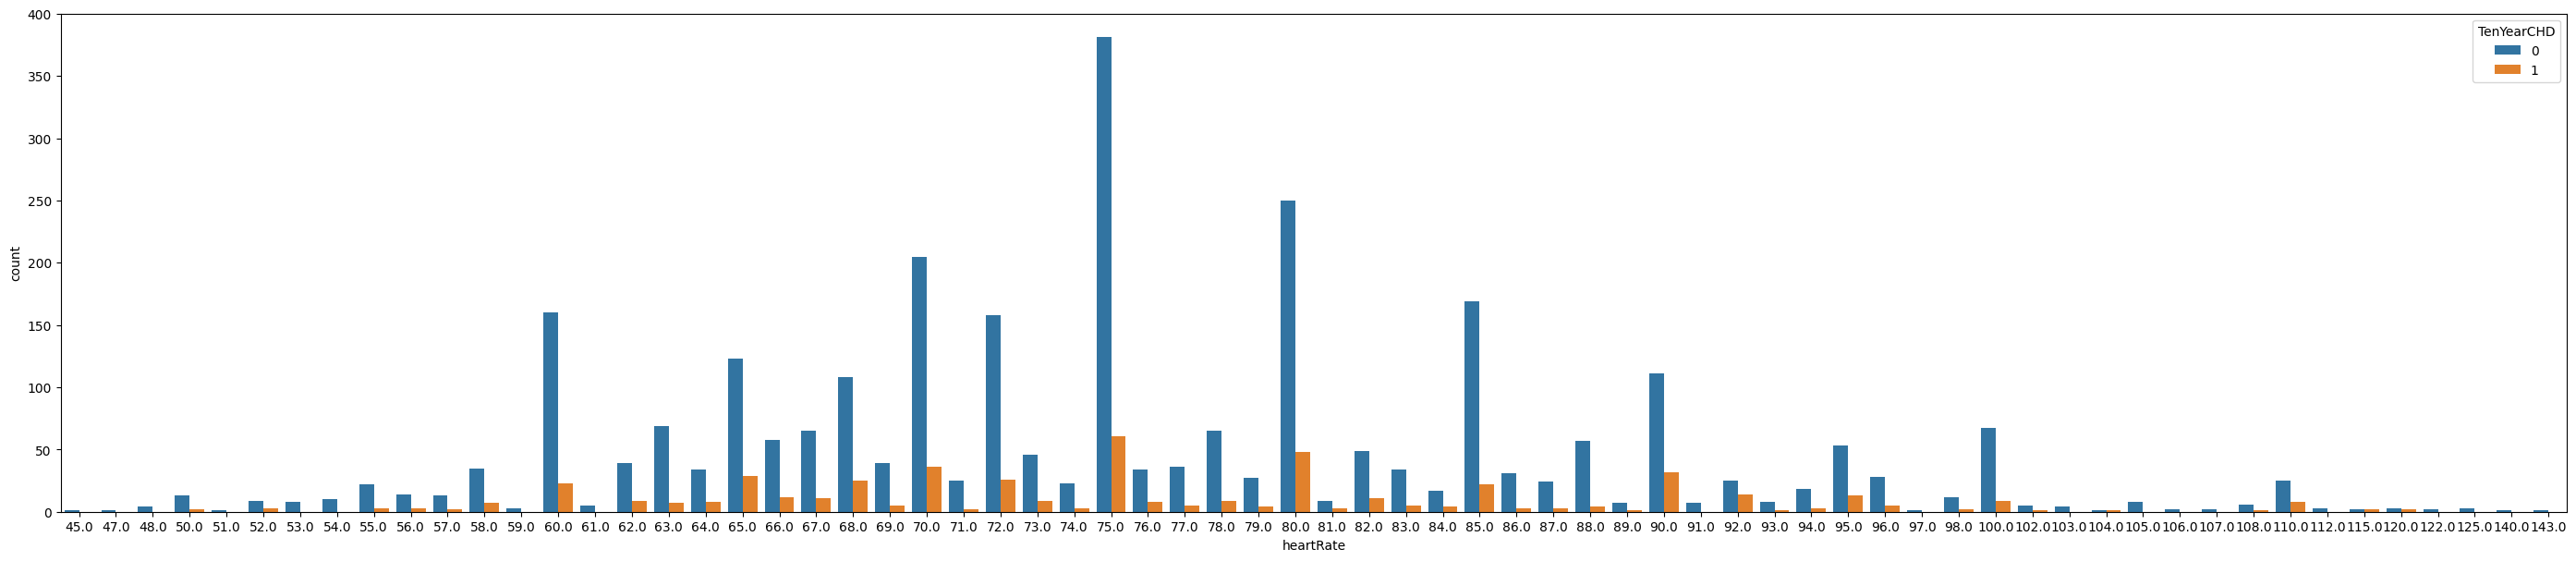

In [ ]:
plt.figure(figsize = (35, 7))
sns.countplot(data = train_df, x = 'heartRate', hue = 'TenYearCHD')

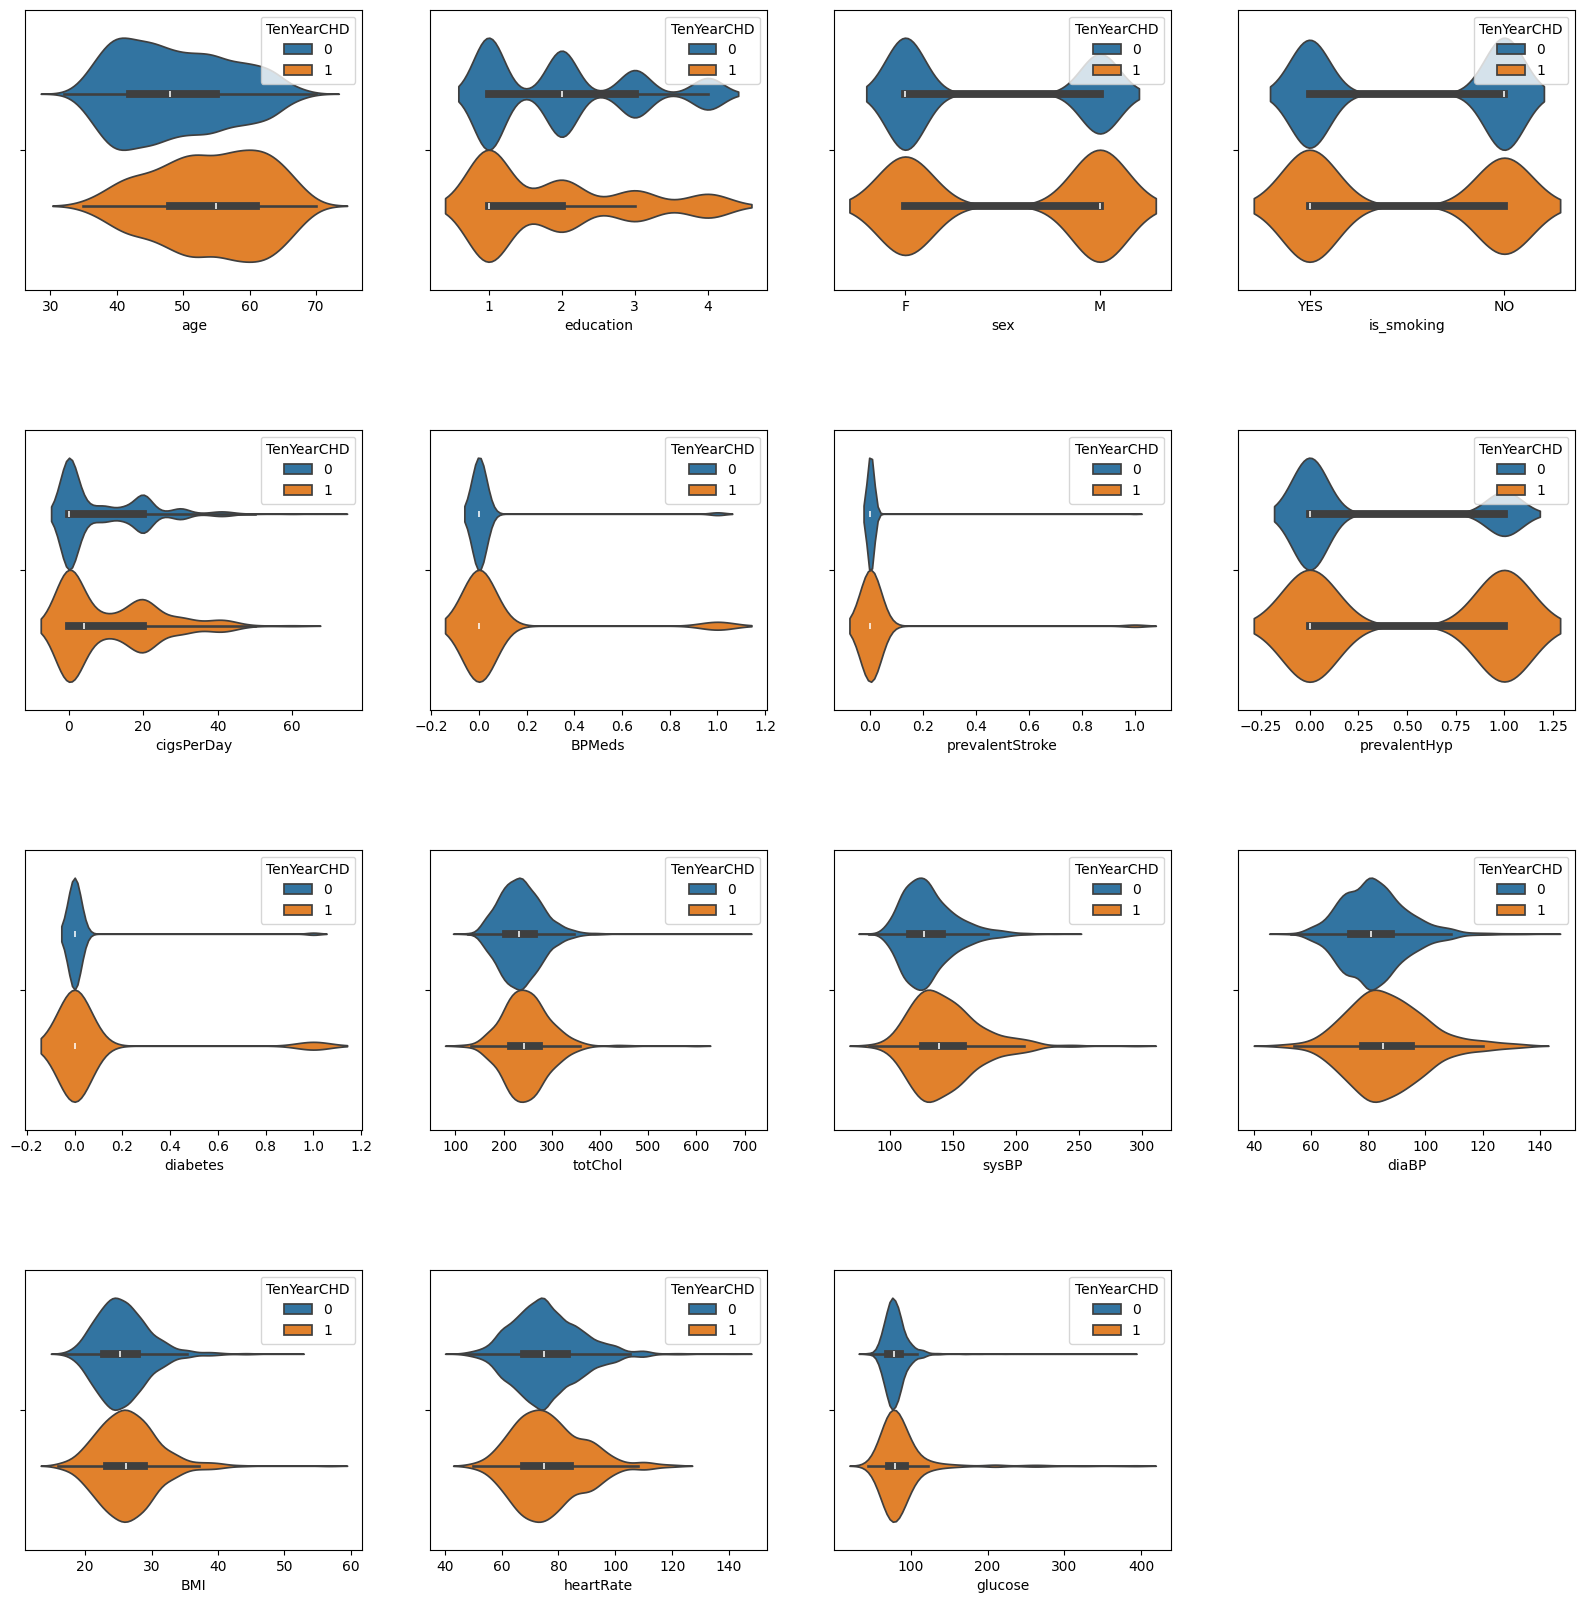

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.5)
for i in range(1, len(train_df.columns)-1):
  plt.subplot(4, 4, i)
  sns.violinplot(x = train_df.columns[i], hue = "TenYearCHD", data = train_df)

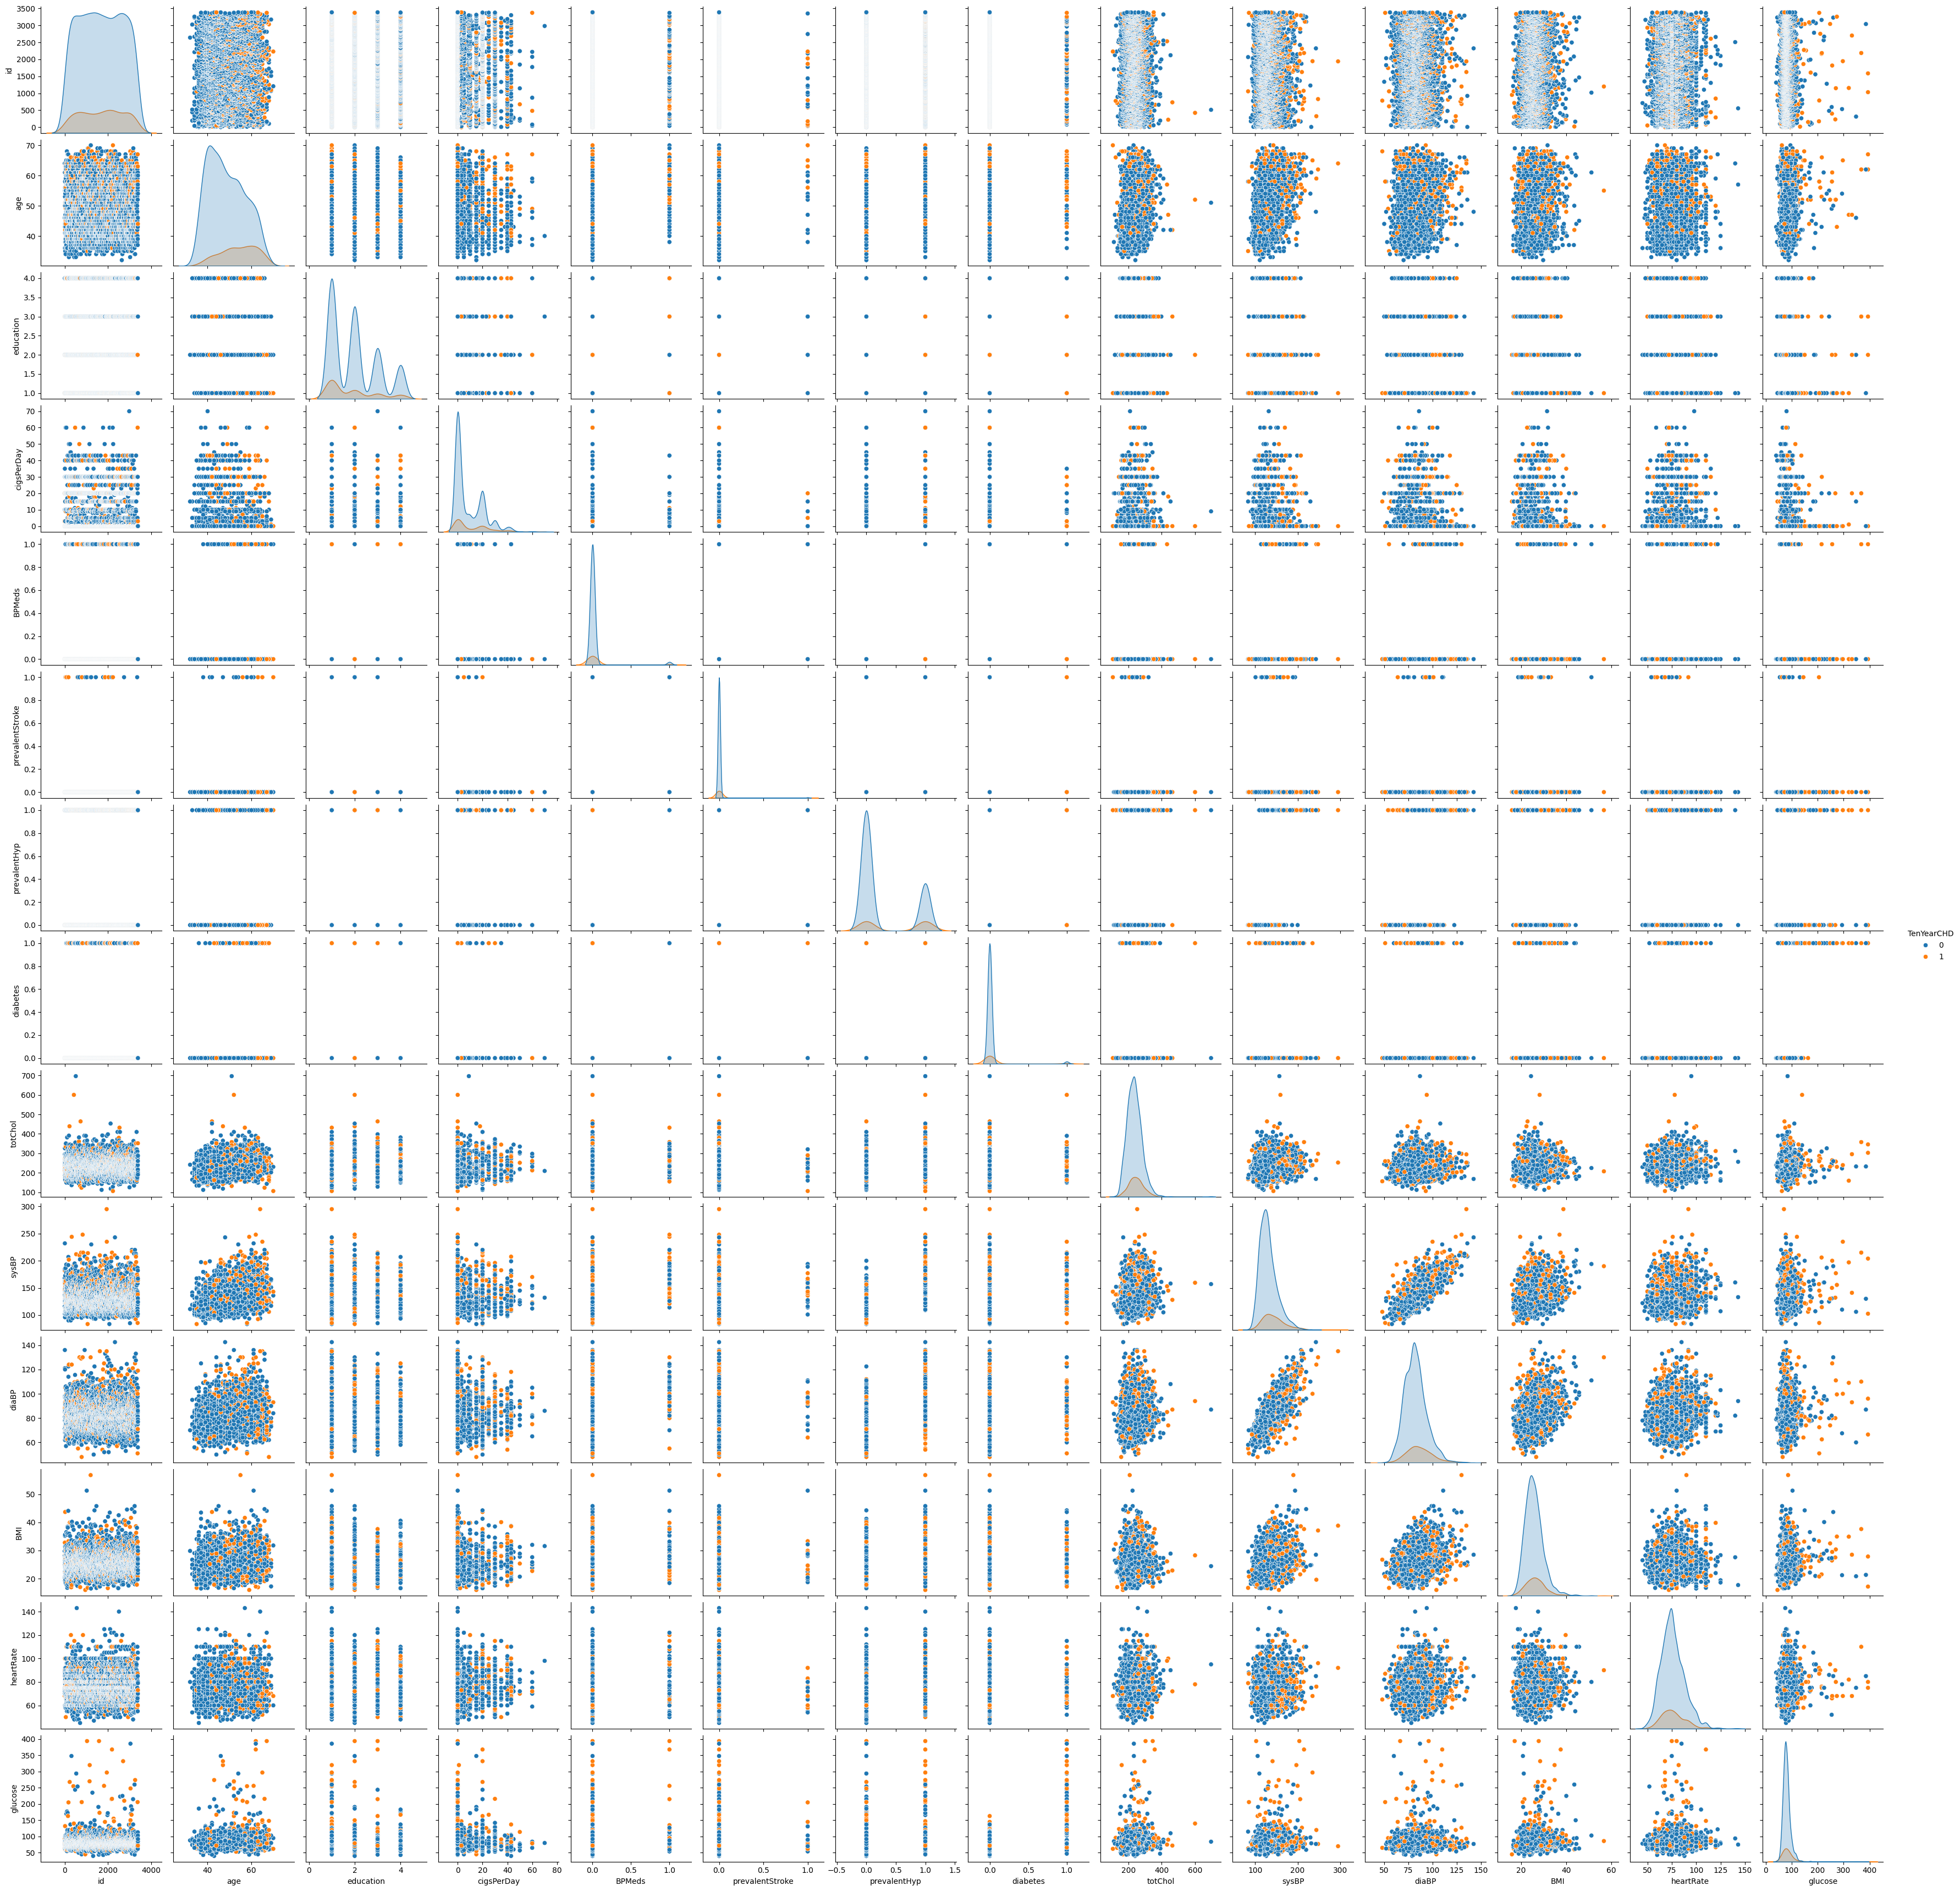

In [ ]:
sns.pairplot(train_df, hue = 'TenYearCHD')

In [ ]:
train_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
train_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

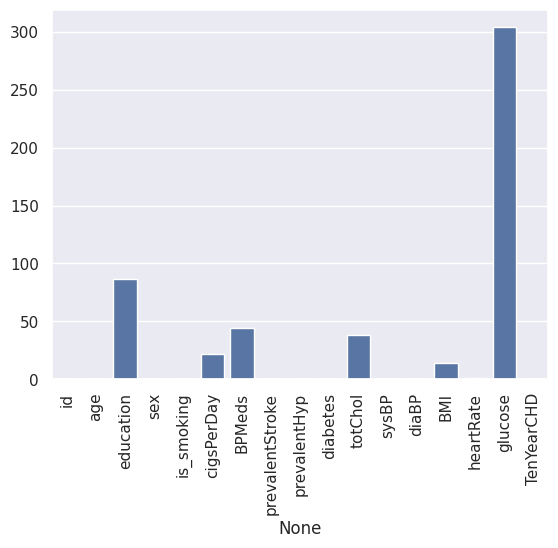

In [ ]:
sns.set_theme()
plt.figure()
sns.barplot(x = train_df.isnull().sum().index, y = train_df.isnull().sum().values)
plt.xticks(rotation = 90)
plt.show()

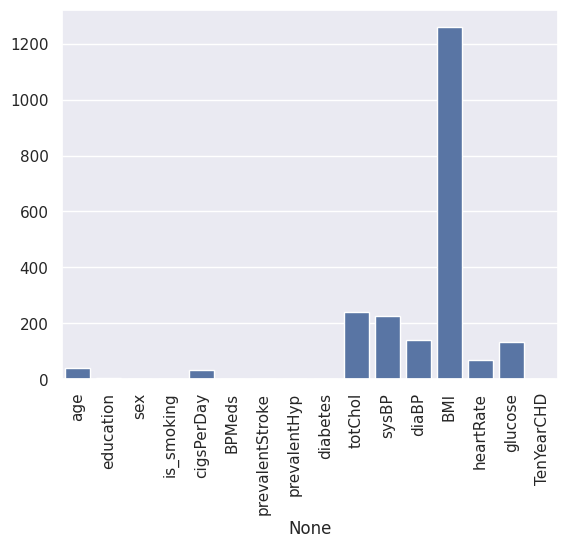

In [ ]:
sns.barplot(x = train_df.drop('id', axis = 1).nunique().index, y = train_df.drop('id', axis = 1).nunique().values)
plt.xticks(rotation = 90)
plt.show();

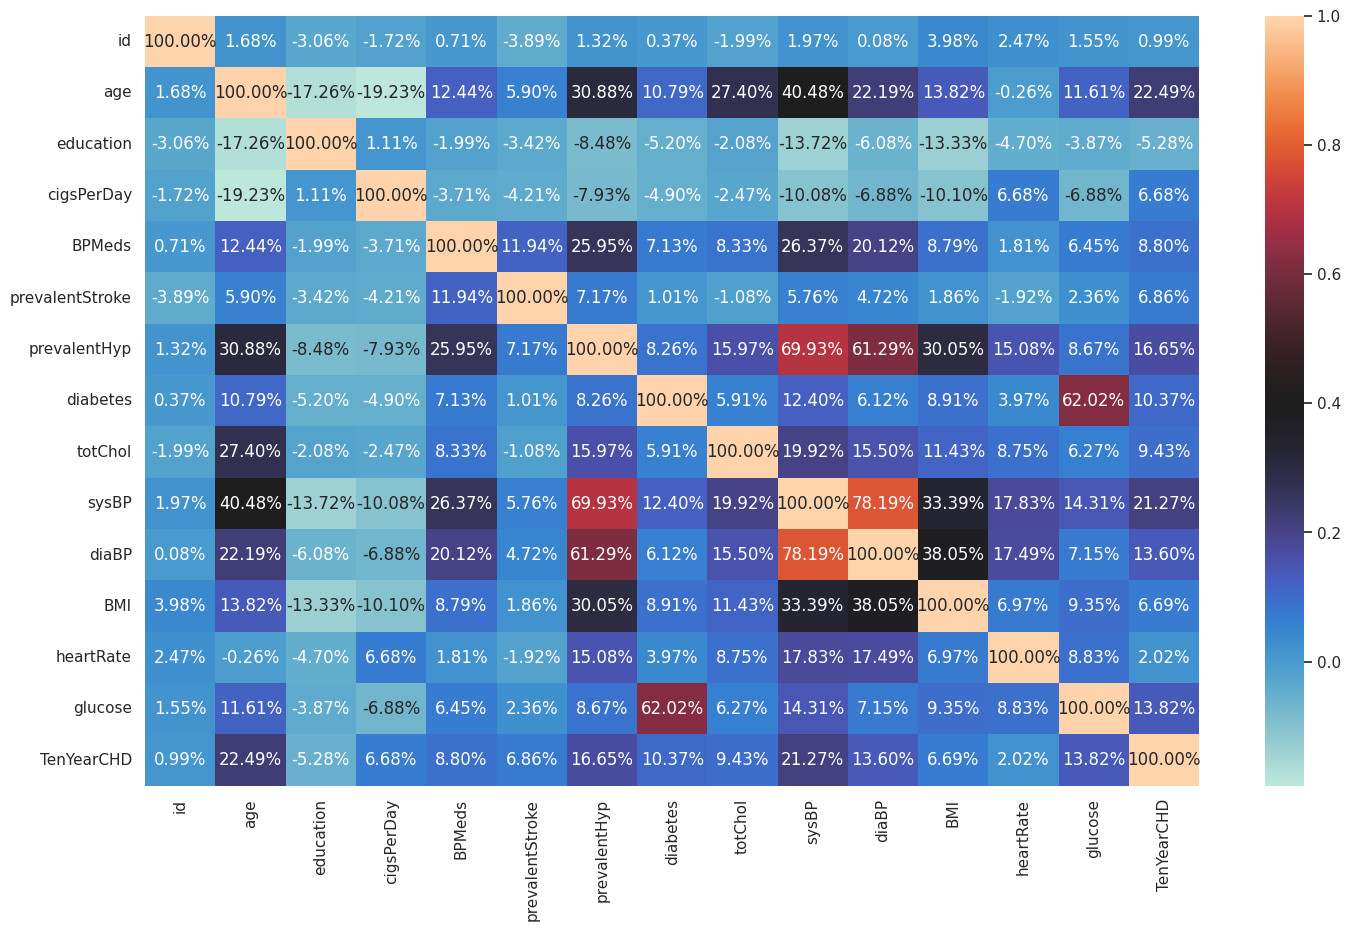

In [ ]:
plt.figure(figsize = (17, 10))
sns.heatmap(train_df.select_dtypes(['float64', 'int64']).corr(), annot = True, cmap = 'icefire', fmt = '.2%')
plt.show()

# Data Preprocessing and model development

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

X = train_df.drop(['id', "TenYearCHD"], axis = 1)
y = train_df['TenYearCHD']
# x_test = test_df.drop(['id'], axis = 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 397.4+ KB


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# Specify columns for imputation
cols_to_impute = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Initialize KNNImputer
imputer = KNNImputer()

# Fit and transform on training data
X[cols_to_impute] = imputer.fit_transform(X[cols_to_impute])

# Transform validation data (using the already fitted imputer)
X[cols_to_impute] = imputer.transform(X[cols_to_impute])



In [ ]:
cols_to_ohe = ['sex', 'is_smoking']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the data
featuress = ohe.fit_transform(X[cols_to_ohe])

# Get the new column names for the one-hot encoded columns
commet = ohe.get_feature_names_out(cols_to_ohe)

# Create a DataFrame for the encoded data with the appropriate column names
X_n = pd.DataFrame(featuress, columns=commet)

# Concatenate the original DataFrame with the encoded DataFrame
X = pd.concat([X.reset_index(drop=True), X_n.reset_index(drop=True)], axis=1)

# Drop the original columns that were one-hot encoded (optional)
X = X.drop(columns=cols_to_ohe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X.head()

age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0         3.0     0.0                0             0   
1   36        4.0         0.0     0.0                0             1   
2   46        1.0        10.0     0.0                0             0   
3   50        1.0        20.0     0.0                0             1   
4   64        1.0        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP     BMI  heartRate  glucose  sex_F  sex_M  \
0         0    221.0  148.0   85.0  28.322       90.0     80.0    1.0    0.0   
1         0    212.0  168.0   98.0  29.770       72.0     75.0    0.0    1.0   
2         0    250.0  116.0   71.0  20.350       88.0     94.0    1.0    0.0   
3         0    233.0  158.0   88.0  28.260       68.0     94.0    0.0    1.0   
4         0    241.0  136.5   85.0  26.420       70.0     77.0    1.0    0.0   

   is_smoking_NO  is_smoking_YES  
0            0.0             1.0  
1            1.0             0.0  
2            0.0             1.0  
3            0.0             1.0  
4            0.0             1.0

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3390 non-null   float64
 8   sysBP            3390 non-null   float64
 9   diaBP            3390 non-null   float64
 10  BMI              3390 non-null   float64
 11  heartRate        3390 non-null   float64
 12  glucose          3390 non-null   float64
 13  sex_F            3390 non-null   float64
 14  sex_M            3390 non-null   float64
 15  is_smoking_NO    3390 non-null   float64
 16  is_smoking_YES   3390 non-null   float64
dtypes: float64(13)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2712 entries, 2378 to 3174
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2712 non-null   float64
 2   cigsPerDay       2712 non-null   float64
 3   BPMeds           2712 non-null   float64
 4   prevalentStroke  2712 non-null   int64  
 5   prevalentHyp     2712 non-null   int64  
 6   diabetes         2712 non-null   int64  
 7   totChol          2712 non-null   float64
 8   sysBP            2712 non-null   float64
 9   diaBP            2712 non-null   float64
 10  BMI              2712 non-null   float64
 11  heartRate        2712 non-null   float64
 12  glucose          2712 non-null   float64
 13  sex_F            2712 non-null   float64
 14  sex_M            2712 non-null   float64
 15  is_smoking_NO    2712 non-null   float64
 16  is_smoking_YES   2712 non-null   float64
dtypes: float64(13), 

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 2712 entries, 2378 to 3174
Series name: TenYearCHD
Non-Null Count  Dtype
--------------  -----
2712 non-null   int64
dtypes: int64(1)
memory usage: 42.4 KB


In [ ]:
rfc = RandomForestClassifier(max_depth=15, n_estimators=220)

# Fit the pipeline
rfc.fit(X_train, y_train)
rf_score = rfc.score(X_val, y_val)*100

In [ ]:
rf_score

85.69321533923303

In [ ]:
abc =  AdaBoostClassifier(n_estimators=175)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=175)

In [ ]:
abc_score = abc.score(X_val, y_val)*100
accuracy = [rf_score, abc_score]
accuracy

[85.69321533923303, 85.69321533923303]

In [ ]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train, y_train)
accuracy.append(GBC.score(X_val, y_val)*100)
accuracy

[85.69321533923303, 85.69321533923303, 85.9882005899705]

In [ ]:
ETC = ExtraTreesClassifier()

ETC.fit(X_train, y_train)
accuracy.append(ETC.score(X_val, y_val)*100)
accuracy

[85.69321533923303, 85.69321533923303, 85.9882005899705, 84.95575221238938]

In [ ]:
HGBC = HistGradientBoostingClassifier()

HGBC.fit(X_train, y_train)
accuracy.append(HGBC.score(X_val, y_val)*100)
accuracy

[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558]

In [ ]:
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)
accuracy.append(DTC.score(X_val, y_val)*100)
accuracy

[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548]

In [ ]:
X_train.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'sex_F', 'sex_M', 'is_smoking_NO',
       'is_smoking_YES'],
      dtype='object')

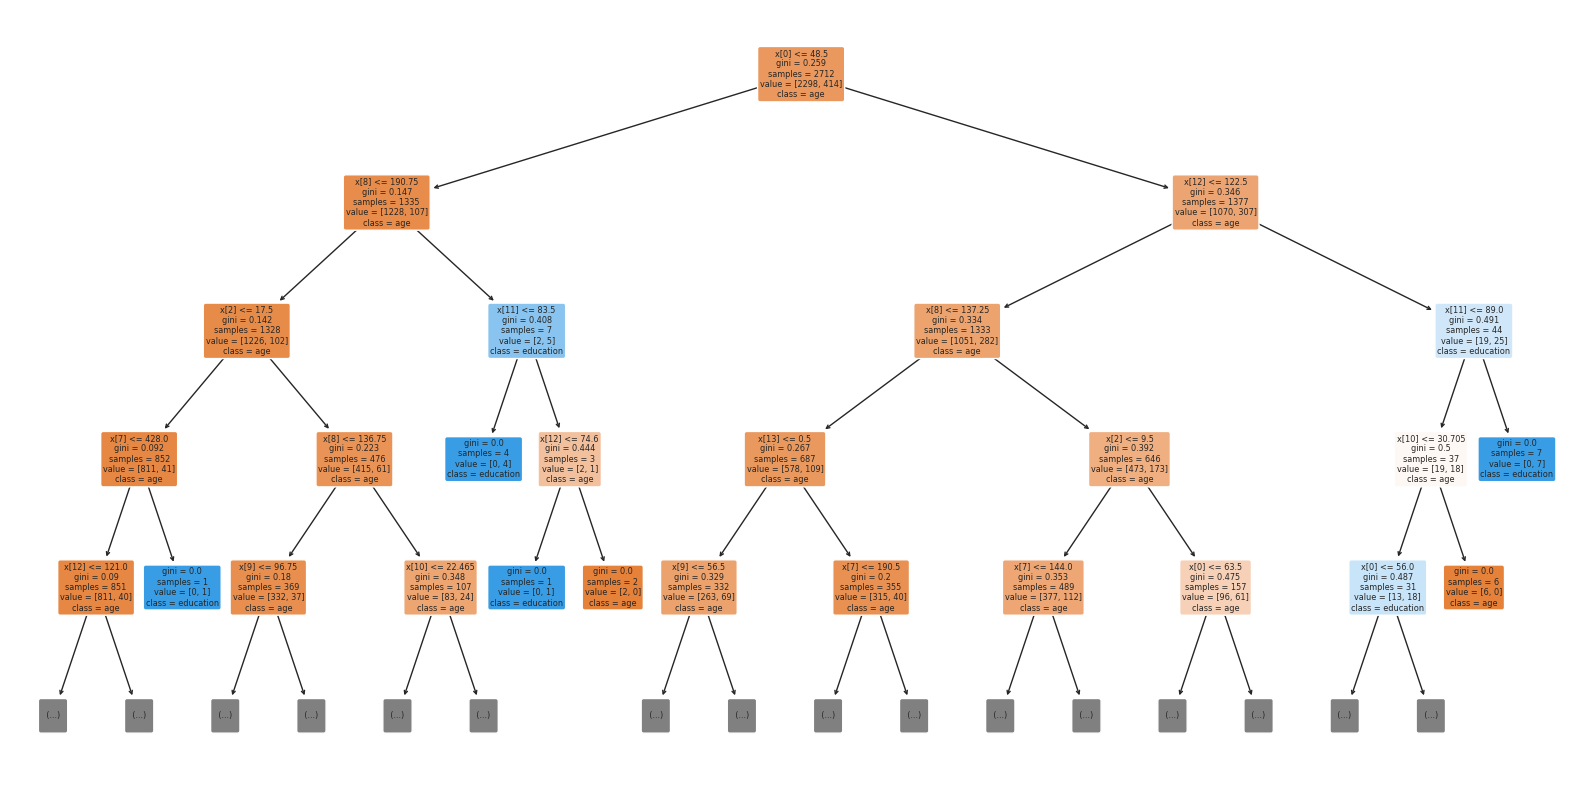

In [ ]:
plt.figure(figsize = (20, 10))
plot_tree(DTC, filled = True, rounded = True, max_depth=4, class_names=X_train.columns);
# plot_tree(DTC, filled = True, rounded = True, class_names=X_train.columns);

In [ ]:
features = X_train.columns
importances = DTC.feature_importances_
indices = np.argsort(importances)

In [ ]:
len(features), len(importances), len(indices)

(17, 17, 17)

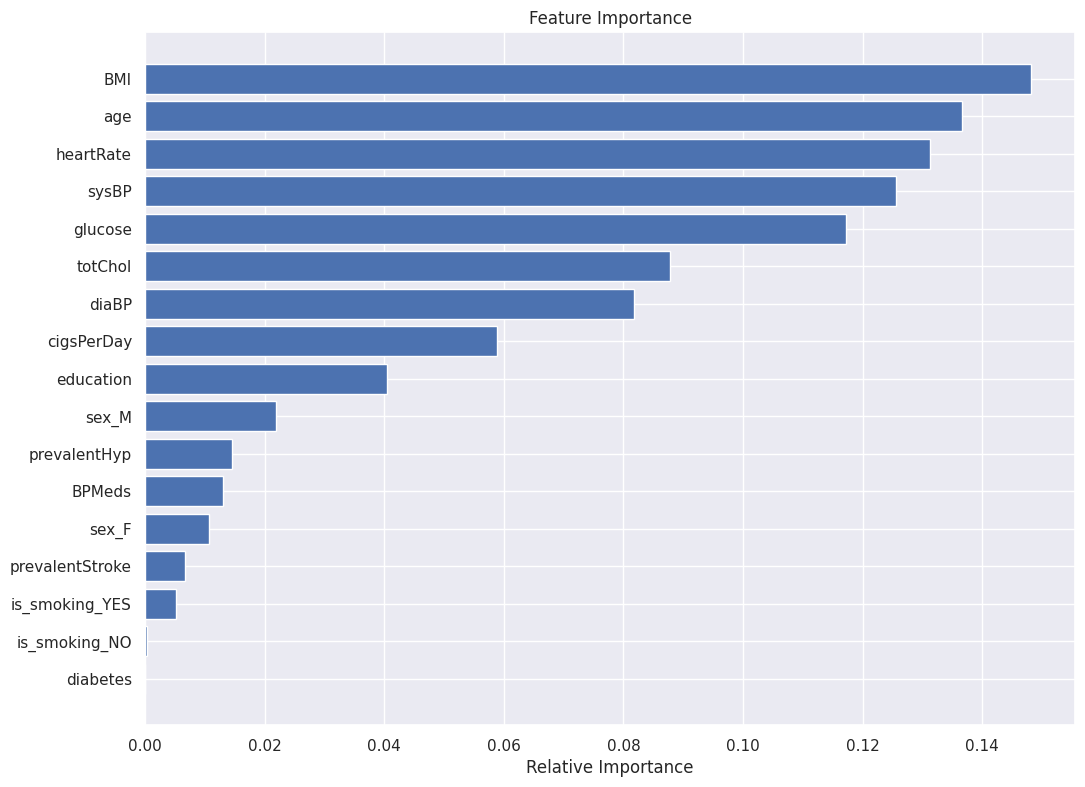

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
SGDC = SGDClassifier(verbose = 1, penalty = 'elasticnet', early_stopping = True, loss = 'perceptron', alpha = 0.01, max_iter = 1000)

SGDC.fit(X_train, y_train)
accuracy.append(SGDC.score(X_val, y_val)*100)
accuracy

-- Epoch 1
Norm: 75.96, NNZs: 17, Bias: -2.480816, T: 2440, Avg. loss: 2525.501289
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 61.69, NNZs: 17, Bias: -2.838833, T: 4880, Avg. loss: 351.536602
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 54.38, NNZs: 15, Bias: -3.126579, T: 7320, Avg. loss: 199.404302
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 50.81, NNZs: 15, Bias: -3.293744, T: 9760, Avg. loss: 134.213093
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 51.16, NNZs: 14, Bias: -3.386641, T: 12200, Avg. loss: 97.259123
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 51.94, NNZs: 14, Bias: -3.490890, T: 14640, Avg. loss: 73.922577
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds


[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548,
 85.69321533923303]

In [ ]:
LR = LogisticRegression(max_iter = 1000)

LR.fit(X_train, y_train)
accuracy.append(LR.score(X_val, y_val)*100)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548,
 85.69321533923303,
 86.57817109144543]

In [ ]:
SVM = SVC(probability = True)

SVM.fit(X_train, y_train)
accuracy.append(SVM.score(X_val, y_val)*100)
accuracy

[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548,
 85.69321533923303,
 86.57817109144543,
 85.54572271386431]

In [ ]:
KNNN = KNeighborsClassifier()

KNNN.fit(X_train, y_train)
accuracy.append(KNNN.score(X_val, y_val)*100)
accuracy

[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548,
 85.69321533923303,
 86.57817109144543,
 85.54572271386431,
 84.95575221238938]

In [ ]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)
accuracy.append(GNB.score(X_val, y_val)*100)
accuracy

[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548,
 85.69321533923303,
 86.57817109144543,
 85.54572271386431,
 84.95575221238938,
 83.6283185840708]

In [ ]:
BNB = BernoulliNB()

BNB.fit(X_train, y_train)
accuracy.append(BNB.score(X_val, y_val)*100)
accuracy

[85.69321533923303,
 85.69321533923303,
 85.9882005899705,
 84.95575221238938,
 85.39823008849558,
 76.10619469026548,
 85.69321533923303,
 86.57817109144543,
 85.54572271386431,
 84.95575221238938,
 83.6283185840708,
 85.84070796460178]

In [ ]:
len(accuracy)

12

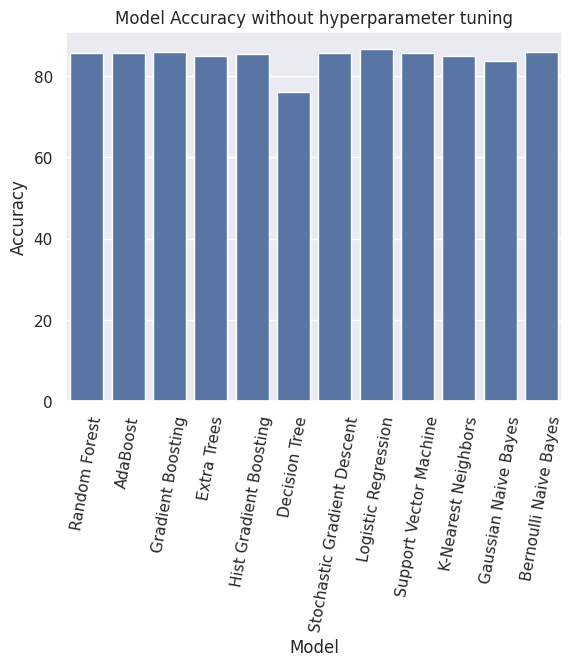

In [ ]:
sns.barplot(x = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Extra Trees', 'Hist Gradient Boosting', 'Decision Tree', 'Stochastic Gradient Descent', 'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes'], y = accuracy, color='b')
plt.title('Model Accuracy without hyperparameter tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation = 80);

In [ ]:
clf = GridSearchCV(estimator = RandomForestClassifier(),
                   param_grid = {
                       'n_estimators': [120, 150],
                       'criterion': ['gini', 'entropy', 'log_loss'],
                       'max_depth': [7, 9, 12],
                       'max_features': ['sqrt', None],

                   })

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 9, 12],
                         'max_features': ['sqrt', None],
                         'n_estimators': [120, 150]})

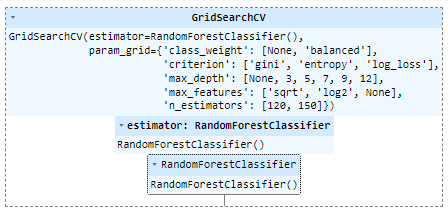

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

In [ ]:
scorer = {'Random Forest': best_score}
pamamer = {'Random Forest': best_params}

({'Random Forest': 0.8491923372272396},
 {'Random Forest': {'class_weight': None,
   'criterion': 'entropy',
   'max_depth': None,
   'max_features': 'sqrt',
   'n_estimators': 120}})

In [ ]:
scorer,pamamer

({'Random Forest': 0.8488246926668161},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150}})

In [ ]:
abc =  AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm='SAMME')
abc.fit(X_train, y_train)
abc.score(X_val, y_val)*100

85.69321533923303

In [ ]:
clf = GridSearchCV(estimator = ExtraTreesClassifier(),
                   param_grid = {
                       'n_estimators': [120, 150],
                       'criterion': ['gini', 'entropy', 'log_loss'],
                       'max_depth': [7, 9, 12],
                       'max_features': ['sqrt', None]},
                   verbose = 1)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 9, 12],
                         'max_features': ['sqrt', None],
                         'n_estimators': [120, 150]},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'Extra Trees Classifier': best_score})
pamamer.update({'Extra Trees Classifier': best_params})

In [ ]:
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120}})

In [ ]:
clf = GridSearchCV(estimator = GradientBoostingClassifier(),
                   param_grid = {
                       'n_estimators': [120, 150],
                       'criterion': ['friedman_mse', 'squared_error'],
                       'max_depth': [3, 5, 9, 12],
                       'max_features': ['sqrt', None]},
                   verbose = 1)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [3, 5, 9, 12],
                         'max_features': ['sqrt', None],
                         'n_estimators': [120, 150]},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'Gradient Boosting Classifier': best_score})
pamamer.update({'Gradient Boosting Classifier': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150}})

In [ ]:
clf = GridSearchCV(estimator = HistGradientBoostingClassifier(),
                   param_grid = {
                       'max_iter': [120, 150],
                       'max_depth': [10, 20],
                       'l2_regularization': [0.0, 0.1, 0.5]},
                   verbose = 1)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'l2_regularization': [0.0, 0.1, 0.5],
                         'max_depth': [10, 20], 'max_iter': [120, 150]},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'Hist Gradient Boosting Classifier': best_score})
pamamer.update({'Hist Gradient Boosting Classifier': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686,
  'Hist Gradient Boosting Classifier': 0.8348154641767411},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Hist Gradient Boosting Classifier': {'l2_regularization': 0.1,
   'max_depth': 10,
   'max_iter': 120}})

In [ ]:
clf = GridSearchCV(estimator = DecisionTreeClassifier(),
                   param_grid = {
                       'criterion': ['gini', 'entropy', 'log_loss'],
                       'splitter': ['best', 'random'],
                       'max_depth': [7, 9, 12],
                       'max_features': ['sqrt', None]},
                   verbose = 1, cv = 5)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 9, 12],
                         'max_features': ['sqrt', None],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'Decision Tree Classifier': best_score})
pamamer.update({'Decision Tree Classifier': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686,
  'Hist Gradient Boosting Classifier': 0.8348154641767411,
  'Decision Tree Classifier': 0.8429199540614191},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Hist Gradient Boosting Classifier': {'l2_regularization': 0.1,
   'max_depth': 10,
   'max_iter': 120},
  'Decision Tree Classifier': {'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'sqrt',
   'splitter': 'random'}})

In [ ]:
clf = GridSearchCV(estimator = SGDClassifier(),
                   param_grid = {
                       'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                       'penalty': ['l2', 'l1', 'elasticnet']
                       },
                   verbose = 1, cv = 5)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', 'perceptron',
                                  'squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'SGD Classifier': best_score})
pamamer.update({'SGD Classifier': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686,
  'Hist Gradient Boosting Classifier': 0.8348154641767411,
  'Decision Tree Classifier': 0.8429199540614191,
  'SGD Classifier': 0.8466052340081411},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Hist Gradient Boosting Classifier': {'l2_regularization': 0.1,
   'max_depth': 10,
   'max_iter': 120},
  'Decision Tree Classifier': {'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'sqrt',
   'splitter': 'random'},
  'SGD Classifier': {'loss': 'log_loss', 'penalty': 'l2'}})

In [ ]:
clf = GridSearchCV(estimator = LogisticRegression(),
                   param_grid = {
                       'penalty': ['l2', 'l1', 'elasticnet']
                       },
                   verbose = 1, cv = 5)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet']}, verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'Logistic Regression': best_score})
pamamer.update({'Logistic Regression': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686,
  'Hist Gradient Boosting Classifier': 0.8348154641767411,
  'Decision Tree Classifier': 0.8429199540614191,
  'SGD Classifier': 0.8466052340081411,
  'Logistic Regression': 0.8488185765835559},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Hist Gradient Boosting Classifier': {'l2_regularization': 0.1,
   'max_depth': 10,
   'max_iter': 120},
  'Decision Tree Classifier': {'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'sqrt',
   'splitter': 'random'},
  'SGD Classifier': {'loss': 'log_loss', 'penalty': 'l2'}

In [ ]:
clf = GridSearchCV(estimator = SVC(),
                   param_grid = {
                       'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                       'shrinking': [True, False]},
                   verbose = 1, cv = 5)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'SVM': best_score})
pamamer.update({'SVM': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686,
  'Hist Gradient Boosting Classifier': 0.8348154641767411,
  'Decision Tree Classifier': 0.8429199540614191,
  'SGD Classifier': 0.8466052340081411,
  'Logistic Regression': 0.8488185765835559,
  'SVM': 0.8480819283330956},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Hist Gradient Boosting Classifier': {'l2_regularization': 0.1,
   'max_depth': 10,
   'max_iter': 120},
  'Decision Tree Classifier': {'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'sqrt',
   'splitter': 'random'},
  'SGD Classifier': {'loss':

In [ ]:
clf = GridSearchCV(estimator = KNeighborsClassifier(),
                   param_grid = {
                        'n_neighbors': [3, 5, 7],
                        'weights': ['uniform', 'distance'],
                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                  },
                   verbose = 1, cv = 5)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_params = clf.best_params_
best_score = clf.best_score_

scorer.update({'KNN classifier': best_score})
pamamer.update({'KNN classifier': best_params})
scorer, pamamer

({'Random Forest': 0.8488246926668161,
  'Extra Trees Classifier': 0.8484543298471658,
  'Gradient Boosting Classifier': 0.8473486779066686,
  'Hist Gradient Boosting Classifier': 0.8348154641767411,
  'Decision Tree Classifier': 0.8429199540614191,
  'SGD Classifier': 0.8466052340081411,
  'Logistic Regression': 0.8488185765835559,
  'SVM': 0.8480819283330956,
  'KNN classifier': 0.8432943942699096},
 {'Random Forest': {'criterion': 'gini',
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Extra Trees Classifier': {'criterion': 'log_loss',
   'max_depth': 9,
   'max_features': 'sqrt',
   'n_estimators': 120},
  'Gradient Boosting Classifier': {'criterion': 'friedman_mse',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Hist Gradient Boosting Classifier': {'l2_regularization': 0.1,
   'max_depth': 10,
   'max_iter': 120},
  'Decision Tree Classifier': {'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'sqrt',
   'splitter':

In [ ]:
pd.DataFrame(scorer, index = ['Score']).T

Score
Random Forest                      0.848825
Extra Trees Classifier             0.848454
Gradient Boosting Classifier       0.847349
Hist Gradient Boosting Classifier  0.834815
Decision Tree Classifier           0.842920
SGD Classifier                     0.846605
Logistic Regression                0.848819
SVM                                0.848082
KNN classifier                     0.843294

<ipython-input-83-0e007c045102>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot((pd.DataFrame(scorer, index = ['Score']).T)['Score'], palette = 'coolwarm')


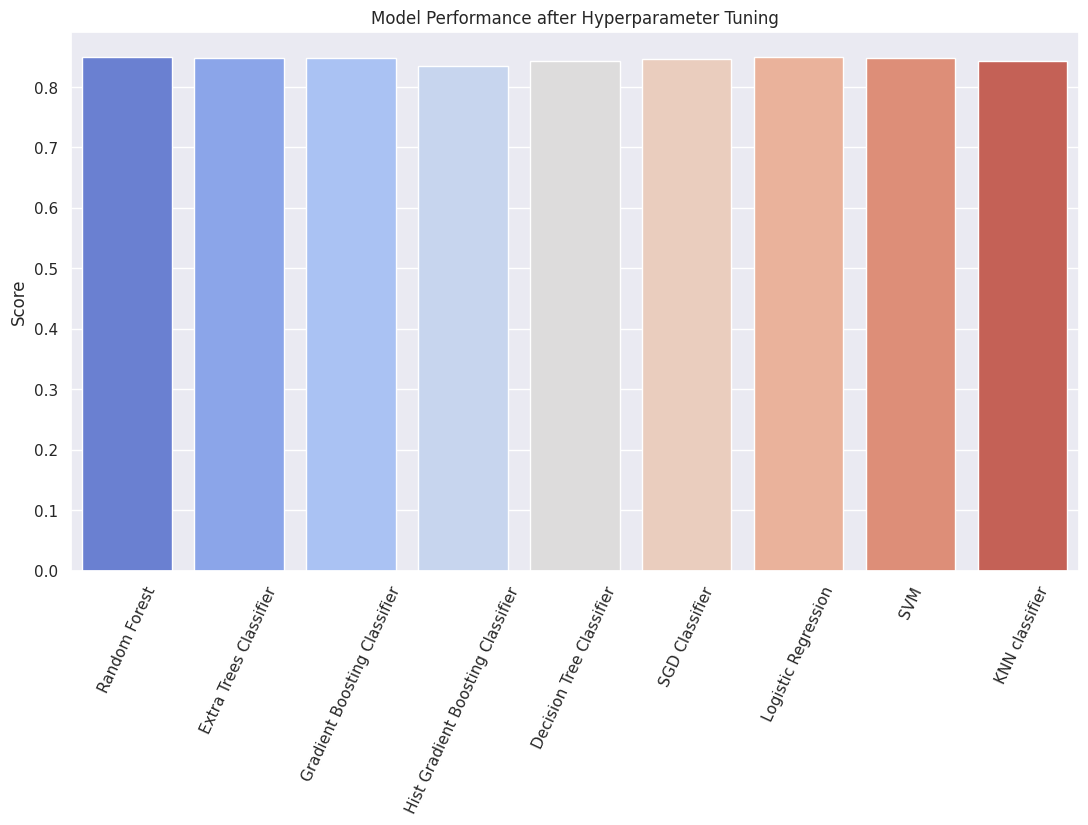

In [ ]:
plt.figure(figsize = (13, 7))
sns.barplot((pd.DataFrame(scorer, index = ['Score']).T)['Score'], palette = 'coolwarm')
plt.xticks(rotation = 65)
plt.title('Model Performance after Hyperparameter Tuning')
plt.show();

In [ ]:
pd.DataFrame(pamamer).T

criterion max_depth max_features  \
Random Forest                              gini        12         sqrt   
Extra Trees Classifier                 log_loss         9         sqrt   
Gradient Boosting Classifier       friedman_mse         3         sqrt   
Hist Gradient Boosting Classifier           NaN      10.0          NaN   
Decision Tree Classifier                entropy         7         sqrt   
SGD Classifier                              NaN       NaN          NaN   
Logistic Regression                         NaN       NaN          NaN   
SVM                                         NaN       NaN          NaN   
KNN classifier                              NaN       NaN          NaN   

                                  n_estimators l2_regularization max_iter  \
Random Forest                              150               NaN      NaN   
Extra Trees Classifier                     120               NaN      NaN   
Gradient Boosting Classifier               150               NaN      NaN   
Hist Gradient Boosting Classifier          NaN               0.1    120.0   
Decision Tree Classifier                   NaN               NaN      NaN   
SGD Classifier                             NaN               NaN      NaN   
Logistic Regression                        NaN               NaN      NaN   
SVM                                        NaN               NaN      NaN   
KNN classifier                             NaN               NaN      NaN   

                                  splitter      loss penalty kernel shrinking  \
Random Forest                          NaN       NaN     NaN    NaN       NaN   
Extra Trees Classifier                 NaN       NaN     NaN    NaN       NaN   
Gradient Boosting Classifier           NaN       NaN     NaN    NaN       NaN   
Hist Gradient Boosting Classifier      NaN       NaN     NaN    NaN       NaN   
Decision Tree Classifier            random       NaN     NaN    NaN       NaN   
SGD Classifier                         NaN  log_loss      l2    NaN       NaN   
Logistic Regression                    NaN       NaN      l2    NaN       NaN   
SVM                                    NaN       NaN     NaN   poly      True   
KNN classifier                         NaN       NaN     NaN    NaN       NaN   

                                  algorithm n_neighbors  weights  
Random Forest                           NaN         NaN      NaN  
Extra Trees Classifier                  NaN         NaN      NaN  
Gradient Boosting Classifier            NaN         NaN      NaN  
Hist Gradient Boosting Classifier       NaN         NaN      NaN  
Decision Tree Classifier                NaN         NaN      NaN  
SGD Classifier                          NaN         NaN      NaN  
Logistic Regression                     NaN         NaN      NaN  
SVM                                     NaN         NaN      NaN  
KNN classifier                         auto           7  uniform

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2712 entries, 2378 to 3174
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2712 non-null   float64
 2   cigsPerDay       2712 non-null   float64
 3   BPMeds           2712 non-null   float64
 4   prevalentStroke  2712 non-null   int64  
 5   prevalentHyp     2712 non-null   int64  
 6   diabetes         2712 non-null   int64  
 7   totChol          2712 non-null   float64
 8   sysBP            2712 non-null   float64
 9   diaBP            2712 non-null   float64
 10  BMI              2712 non-null   float64
 11  heartRate        2712 non-null   float64
 12  glucose          2712 non-null   float64
 13  sex_F            2712 non-null   float64
 14  sex_M            2712 non-null   float64
 15  is_smoking_NO    2712 non-null   float64
 16  is_smoking_YES   2712 non-null   float64
dtypes: float64(13), 

# NEW ONE

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

X = train_df.drop(['id', "TenYearCHD"], axis = 1)
y = train_df['TenYearCHD']
X_t = test_df.drop(['id'], axis = 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
cols_to_impute = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
cols_to_ohe = ['sex', 'is_smoking']

imputer = KNNImputer()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')


preprocessing = ColumnTransformer(
    transformers=[
        ('impute', imputer, cols_to_impute),
        ('encode', ohe, cols_to_ohe)
    ],
    remainder='passthrough'
)

rfc = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('classifier', RandomForestClassifier(max_depth=15, n_estimators=220))
])

rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', KNNImputer(),
                                                  ['education', 'cigsPerDay',
                                                   'BPMeds', 'totChol', 'BMI',
                                                   'heartRate', 'glucose']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'is_smoking'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, n_estimators=220))])

In [ ]:
print(f"{rfc.score(X_val, y_val)*100}%")

86.13569321533923%


In [ ]:
joblib.dump(rfc, 'rfc.pkl')

NameError: name 'rfc' is not defined

In [ ]:
X_train.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  2712.000000  2642.000000  2696.000000  2678.000000      2712.000000   
mean     49.626475     1.975776     9.056380     0.030993         0.006637   
std       8.604739     1.023845    11.973989     0.173332         0.081213   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      57.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    60.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol        sysBP        diaBP  \
count   2712.000000  2712.000000  2680.000000  2712.000000  2712.000000   
mean       0.318584     0.026549   237.403731   132.819506    82.906342   
std        0.466013     0.160790    45.130598    21.897976    11.906368   
min        0.000000     0.000000   107.000000    83.500000    48.000000   
25%        0.000000     0.000000   206.000000   117.500000    75.000000   
50%        0.000000     0.000000   234.000000   129.000000    82.000000   
75%        1.000000     0.000000   265.000000   144.000000    90.000000   
max        1.000000     1.000000   696.000000   243.000000   142.500000   

               BMI    heartRate      glucose  
count  2701.000000  2711.000000  2471.000000  
mean     25.832780    75.974179    82.061109  
std       4.043327    11.981970    24.467112  
min      16.480000    45.000000    40.000000  
25%      23.090000    68.000000    71.000000  
50%      25.400000    75.000000    78.000000  
75%      27.990000    83.000000    86.000000  
max      51.280000   143.000000   394.000000

In [ ]:
modle = joblib.load('rfc.joblib')

In [ ]:
X_train.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
2378   66        1.0   F         NO         0.0     1.0                0   
3182   53        1.0   F         NO         0.0     0.0                0   
921    46        3.0   F        YES        20.0     0.0                0   
2244   40        1.0   F        YES        50.0     NaN                0   
3131   51        2.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
2378             1         0    290.0  152.5   90.0  23.63       80.0     76.0  
3182             1         0    267.0  152.0   89.0  28.49       94.0    103.0  
921              0         0    259.0  129.0   83.0  22.91       66.0     84.0  
2244             0         0    220.0  124.0   79.0  20.70       90.0     57.0  
3131             0         0    234.0  114.0   85.0  28.68       72.0     84.0

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2712 entries, 2378 to 3174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2642 non-null   float64
 2   sex              2712 non-null   object 
 3   is_smoking       2712 non-null   object 
 4   cigsPerDay       2696 non-null   float64
 5   BPMeds           2678 non-null   float64
 6   prevalentStroke  2712 non-null   int64  
 7   prevalentHyp     2712 non-null   int64  
 8   diabetes         2712 non-null   int64  
 9   totChol          2680 non-null   float64
 10  sysBP            2712 non-null   float64
 11  diaBP            2712 non-null   float64
 12  BMI              2701 non-null   float64
 13  heartRate        2711 non-null   float64
 14  glucose          2471 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 339.0+ KB


In [ ]:
sample_data = pd.DataFrame([{
    'age': 64,
    'education': 2.0,
    'sex': "F",
    'is_smoking': "YES",
    'cigsPerDay': 3,
    'BPMeds': 0.0,
    'prevalentStroke': 0,
    'prevalentHyp': 0,
    'diabetes': 0,
    'totChol': 221.0,
    'sysBP': 148.0,
    'diaBP': 85.0,
    'BMI': 29.77,
    'heartRate': 90.0,
    'glucose': 80.0
}])

# Make predictions on the sample data using the loaded model
predictions = modle.predict(sample_data)
print('Predictions on sample data:', predictions[0])

Predictions on sample data: 0


In [ ]:
matter = modle.predict(X_val)

In [ ]:
confusion_matrix(y_val, matter)

array([[577,   4],
       [ 90,   7]])

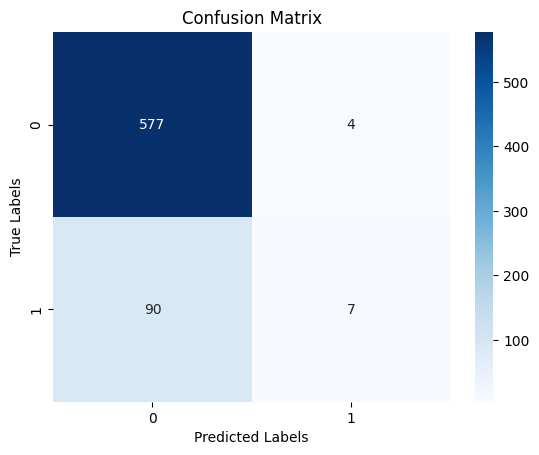

In [ ]:
sns.heatmap(confusion_matrix(y_val, matter), annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
precision = precision_score(y_val, matter)
recall = recall_score(y_val, matter)
f1 = f1_score(y_val, matter)

In [ ]:
list = [precision, recall, f1]
list

[0.6363636363636364, 0.07216494845360824, 0.12962962962962962]

<ipython-input-50-df8147051497>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ['Precision', 'Recall', 'F1 Score'], y = list, palette = 'coolwarm')


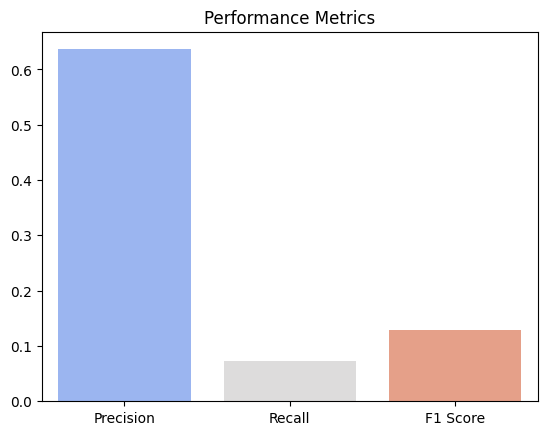

In [ ]:
sns.barplot(x = ['Precision', 'Recall', 'F1 Score'], y = list, palette = 'coolwarm')
plt.title('Performance Metrics')
plt.show()